## Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import mlflow
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

## Data Loading and Exploration

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [4]:
train.shape

(165034, 14)

In [5]:
test.head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
5,165039,15672704,Pearson,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72
6,165040,15647838,Onyemere,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67
7,165041,15775307,Hargreaves,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29
8,165042,15653937,Hsueh,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10
9,165043,15752344,Teng,645,Spain,Male,30.0,5,0.00,2,0.0,1.0,149195.44


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
# checking for duplicates in the train set
idsUnique = len(set(train.id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print(f"There are {idsDupli} duplicate IDs for {idsTotal} total entries")

There are 0 duplicate IDs for 165034 total entries


In [8]:
# checking for class imbalance - the class is called Exited
train['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [9]:
# seeing the imbalance ratio
train['Exited'].value_counts()/len(train)

Exited
0    0.788401
1    0.211599
Name: count, dtype: float64

In [10]:
# removing the id column for train and test set (keep for test set for submission)
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [11]:
# checking for missing values
train.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# separating the target variable and merging train and test set for data cleaning
X = train.drop('Exited', axis=1)
y = train['Exited']

In [13]:
# merging with pd.concat
X = pd.concat([X, test], axis=0)

In [14]:
X.shape

(275057, 12)

## Performing EDA

In [15]:
# classifying the columns into categorical and numerical
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
num_cols = [col for col in X.columns if X[col].dtype != 'object']

In [16]:
cat_cols

['Surname', 'Geography', 'Gender']

In [17]:
num_cols

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [18]:
# checking for unique values in surname and customer id
X['Surname'].nunique()

2889

In [19]:
X['CustomerId'].nunique()

28474

so we have repeated customers

In [20]:
# checking the unique geography
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
X.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [22]:
X.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,2.750570e+05,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000
mean,1.569204e+07,656.484939,38.124415,5.010867,55420.296450,1.554002,0.753589,0.496755,112470.952558
std,7.151271e+04,80.188100,8.864927,2.806173,62805.933171,0.546178,0.430921,0.499990,50286.608747
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1.563300e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117848.090000
75%,1.575688e+07,710.000000,42.000000,7.000000,120037.960000,2.000000,1.000000,1.000000,154871.130000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [23]:
# going back to the train set to make some analysis
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [24]:
# Using groupby to see which country has the most exited customers
train.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         78643
           1         15572
Germany    0         21492
           1         13114
Spain      0         29978
           1          6235
Name: count, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

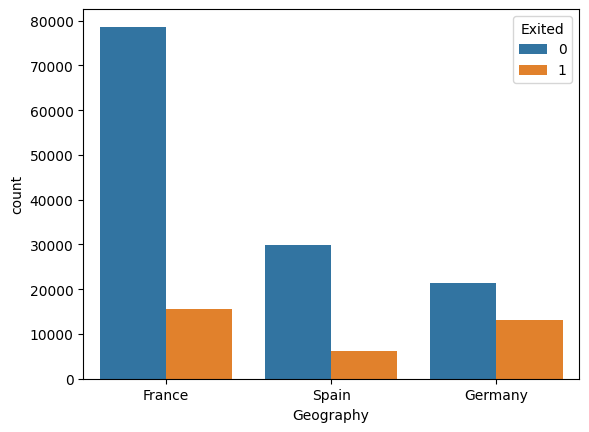

In [25]:
# creating a plot for this
sns.countplot(x='Geography', hue='Exited', data=train)

Majority of the customers in germany seems to be more excited averagely

Getting the respective long and lat 

In [26]:
# opening the long and lat file 
long_lat = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')
long_lat.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [27]:
# trimming the dataset
long_lat = long_lat[['country', 'latitude', 'longitude']]
long_lat.head()

,country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [28]:
# getting the long and lat for the countries in the Geography column
train = pd.merge(train, long_lat, left_on='Geography', right_on='country', how='left')
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country,latitude,longitude
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,France,46.227638,2.213749
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,France,46.227638,2.213749
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,France,46.227638,2.213749
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,France,46.227638,2.213749
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,Spain,40.463667,-3.749220


In [29]:
# now merging for the X set
X = pd.merge(X, long_lat, left_on='Geography', right_on='country', how='left')
X.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country,latitude,longitude
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,France,46.227638,2.213749
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,France,46.227638,2.213749
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,France,46.227638,2.213749
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,France,46.227638,2.213749
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,Spain,40.463667,-3.749220


In [30]:
# dropping the country column in train and X set
train.drop('country', axis=1, inplace=True)
X.drop('country', axis=1, inplace=True)

In [31]:
X.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,latitude,longitude
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,46.227638,2.213749
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,46.227638,2.213749
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,46.227638,2.213749
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,46.227638,2.213749
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,40.463667,-3.749220


In [33]:
# selecting categorical feautures for one hot encoding
cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# now using pd.get_dummies to one hot encode and setting them as integers

X_ = pd.get_dummies(X, columns=cols, drop_first=True, dtype='int64')
X_.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,latitude,longitude,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1.0,IsActiveMember_1.0
0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,181449.97,46.227638,2.213749,0,0,1,1,0
1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,49503.50,46.227638,2.213749,0,0,1,1,1
2,15694510,Hsueh,678,40.0,10,0.00,2,184866.69,46.227638,2.213749,0,0,1,1,0
3,15741417,Kao,581,34.0,2,148882.54,1,84560.88,46.227638,2.213749,0,0,1,1,1
4,15766172,Chiemenam,716,33.0,5,0.00,2,15068.83,40.463667,-3.749220,0,1,1,1,1


In [34]:
# classifying the columns into categorical and numerical
cat_cols = [col for col in X_.columns if X_[col].dtype == 'object']
num_cols = [col for col in X_.columns if X_[col].dtype != 'object']

In [35]:
print(cat_cols, num_cols)

['Surname'] ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'latitude', 'longitude', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'HasCrCard_1.0', 'IsActiveMember_1.0']


In [34]:
# # using ordinal encoder to encode the categorical columns
# encoder = OrdinalEncoder()
# X[cat_cols] = encoder.fit_transform(X[cat_cols])

In [36]:
X_

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,latitude,longitude,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1.0,IsActiveMember_1.0
0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,181449.97,46.227638,2.213749,0,0,1,1,0
1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,49503.50,46.227638,2.213749,0,0,1,1,1
2,15694510,Hsueh,678,40.0,10,0.00,2,184866.69,46.227638,2.213749,0,0,1,1,0
3,15741417,Kao,581,34.0,2,148882.54,1,84560.88,46.227638,2.213749,0,0,1,1,1
4,15766172,Chiemenam,716,33.0,5,0.00,2,15068.83,40.463667,-3.749220,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275052,15662091,P'eng,570,29.0,7,116099.82,1,148087.62,40.463667,-3.749220,0,1,1,1,1
275053,15774133,Cox,575,36.0,4,178032.53,1,42181.68,46.227638,2.213749,0,0,0,1,1
275054,15728456,Ch'iu,712,31.0,2,0.00,2,16287.38,46.227638,2.213749,0,0,1,1,0
275055,15687541,Yegorova,709,32.0,3,0.00,1,158816.58,46.227638,2.213749,0,0,0,1,1


## Feature Engineering

In [36]:
# how about analyzing the CustemerId column? To derive possible features based on each customer
# using the groupby function to create extra features that correspond to each customer
# features like max and min credit score, max and min age, max and min tenure, max and min balance, max and min number of products, max and min estimated salary, then average credit score, average age, average tenure, average balance, average number of products, average estimated salary
# mean of the categorical columns, mode of the categorical columns, median of the categorical columns, standard deviation of the categorical columns, variance of the categorical columns, 
# number of countries, and possible relationshop between estimatedsalary, age, and so on
# using the X set for this

In [37]:
df = X_.copy()

In [38]:
max_features = df.groupby('CustomerId').agg({
    'CreditScore': 'max',
    'Age': 'max',
    'Tenure': 'max',
    'Balance': 'max',
    'NumOfProducts': 'max',
    'EstimatedSalary': 'max'
}).rename(columns=lambda x: f'Max_{x}')

min_features = df.groupby('CustomerId').agg({
    'CreditScore': 'min',
    'Age': 'min',
    'Tenure': 'min',
    'Balance': 'min',
    'NumOfProducts': 'min',
    'EstimatedSalary': 'min'
}).rename(columns=lambda x: f'Min_{x}')


In [39]:
max_features

,Max_CreditScore,Max_Age,Max_Tenure,Max_Balance,Max_NumOfProducts,Max_EstimatedSalary
CustomerId,,,,,,
15565701,846,49.0,9,161993.89,2,129822.79
15565706,787,71.0,8,144962.74,2,160593.41
15565714,783,47.0,9,152390.25,2,194617.98
15565759,700,59.0,8,106589.73,1,185599.71
15565779,823,45.0,10,116084.32,2,188258.49
...,...,...,...,...,...,...
15815645,849,45.0,10,175575.95,2,198193.75
15815656,559,40.0,10,114668.89,1,199808.10
15815660,757,48.0,9,165272.13,3,168035.62


In [40]:
average_features = df.groupby('CustomerId').agg({
    'CreditScore': 'mean',
    'Age': 'mean',
    'Tenure': 'mean',
    'Balance': 'mean',
    'NumOfProducts': 'mean',
    'EstimatedSalary': 'mean'
}).rename(columns=lambda x: f'Average_{x}')


In [41]:
average_features

,Average_CreditScore,Average_Age,Average_Tenure,Average_Balance,Average_NumOfProducts,Average_EstimatedSalary
CustomerId,,,,,,
15565701,739.000000,38.500000,6.250000,107799.340000,1.250000,101307.162500
15565706,656.666667,40.833333,3.750000,39259.289167,1.416667,95160.421667
15565714,609.181818,39.545455,3.363636,61485.443636,1.727273,97808.718182
15565759,700.000000,59.000000,8.000000,106589.730000,1.000000,185599.710000
15565779,677.142857,37.571429,5.285714,38933.487143,1.428571,133794.762857
...,...,...,...,...,...,...
15815645,666.954545,36.318182,5.681818,112204.996818,1.454545,135990.263182
15815656,545.500000,38.250000,9.250000,103754.725000,1.000000,171007.325000
15815660,650.333333,37.666667,5.500000,75800.736667,1.333333,99291.148333


In [42]:
enriched_df = pd.concat([max_features, min_features, average_features], axis=1)
final_df = df.merge(enriched_df, how='left', on='CustomerId')


In [43]:
final_df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,latitude,longitude,...,Min_Tenure,Min_Balance,Min_NumOfProducts,Min_EstimatedSalary,Average_CreditScore,Average_Age,Average_Tenure,Average_Balance,Average_NumOfProducts,Average_EstimatedSalary
0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,181449.97,46.227638,2.213749,...,0,0.0,1,1299.75,672.000000,40.620690,6.086207,43982.075517,1.568966,123338.534483
1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,49503.50,46.227638,2.213749,...,1,0.0,1,16897.19,680.633333,39.300000,5.666667,32795.007333,1.600000,119429.114333
2,15694510,Hsueh,678,40.0,10,0.00,2,184866.69,46.227638,2.213749,...,0,0.0,1,24218.65,652.717391,38.760870,4.891304,79355.473261,1.478261,108407.198478
3,15741417,Kao,581,34.0,2,148882.54,1,84560.88,46.227638,2.213749,...,0,0.0,1,598.80,659.084337,36.867470,4.831325,70440.101687,1.554217,104463.851325
4,15766172,Chiemenam,716,33.0,5,0.00,2,15068.83,40.463667,-3.749220,...,1,0.0,1,1485.58,644.785714,36.071429,4.976190,65053.064048,1.547619,110574.626905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275052,15662091,P'eng,570,29.0,7,116099.82,1,148087.62,40.463667,-3.749220,...,0,0.0,1,1408.01,666.560000,38.613333,5.000000,55278.934133,1.520000,128388.191733
275053,15774133,Cox,575,36.0,4,178032.53,1,42181.68,46.227638,2.213749,...,1,0.0,1,42135.28,669.166667,36.000000,4.000000,73652.595833,1.416667,91341.109167
275054,15728456,Ch'iu,712,31.0,2,0.00,2,16287.38,46.227638,2.213749,...,1,0.0,1,12577.21,669.115385,36.461538,4.730769,49726.449615,1.423077,79528.587308
275055,15687541,Yegorova,709,32.0,3,0.00,1,158816.58,46.227638,2.213749,...,3,0.0,1,158816.58,709.000000,32.000000,3.000000,0.000000,1.000000,158816.580000


In [44]:
# now extracting the train set 
# train_ = final_df[:train.shape[0]]
train_ = X_[:train.shape[0]]
train_.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,latitude,longitude,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1.0,IsActiveMember_1.0
0,15674932,Okwudilichukwu,668,33.0,3,0.00,2,181449.97,46.227638,2.213749,0,0,1,1,0
1,15749177,Okwudiliolisa,627,33.0,1,0.00,2,49503.50,46.227638,2.213749,0,0,1,1,1
2,15694510,Hsueh,678,40.0,10,0.00,2,184866.69,46.227638,2.213749,0,0,1,1,0
3,15741417,Kao,581,34.0,2,148882.54,1,84560.88,46.227638,2.213749,0,0,1,1,1
4,15766172,Chiemenam,716,33.0,5,0.00,2,15068.83,40.463667,-3.749220,0,1,1,1,1


In [45]:
# extracting the test set
# test_ = final_df[train.shape[0]:]
test_ = X_[train.shape[0]:]
test_.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,latitude,longitude,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1.0,IsActiveMember_1.0
165034,15773898,Lucchese,586,23.0,2,0.00,2,160976.75,46.227638,2.213749,0,0,0,0,1
165035,15782418,Nott,683,46.0,2,0.00,1,72549.27,46.227638,2.213749,0,0,0,1,0
165036,15807120,K?,656,34.0,7,0.00,2,138882.09,46.227638,2.213749,0,0,0,1,0
165037,15808905,O'Donnell,681,36.0,8,0.00,1,113931.57,46.227638,2.213749,0,0,1,1,0
165038,15607314,Higgins,752,38.0,10,121263.62,1,139431.00,51.165691,10.451526,1,0,1,1,0


In [46]:
# dropping the CustomerId column fron train_ and test_
train_.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
test_.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

C:\Users\timmy\AppData\Local\Temp\ipykernel_13804\2443527861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
C:\Users\timmy\AppData\Local\Temp\ipykernel_13804\2443527861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_.drop(['CustomerId', 'Surname'], axis=1, inplace=True)


In [47]:
train_.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,latitude,longitude,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1.0,IsActiveMember_1.0
0,668,33.0,3,0.00,2,181449.97,46.227638,2.213749,0,0,1,1,0
1,627,33.0,1,0.00,2,49503.50,46.227638,2.213749,0,0,1,1,1
2,678,40.0,10,0.00,2,184866.69,46.227638,2.213749,0,0,1,1,0
3,581,34.0,2,148882.54,1,84560.88,46.227638,2.213749,0,0,1,1,1
4,716,33.0,5,0.00,2,15068.83,40.463667,-3.749220,0,1,1,1,1


In [48]:
train_.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,latitude,longitude,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1.0,IsActiveMember_1.0
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,112574.822734,45.998325,2.632690,0.209690,0.219428,0.564429,0.753954,0.497770
std,80.103340,8.867205,2.806159,62817.663278,0.547154,50292.865585,3.514366,4.675102,0.407089,0.413860,0.495833,0.430707,0.499997
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,40.463667,-3.749220,0.000000,0.000000,0.000000,0.000000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,74637.570000,46.227638,2.213749,0.000000,0.000000,0.000000,1.000000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,117948.000000,46.227638,2.213749,0.000000,0.000000,1.000000,1.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,155152.467500,46.227638,2.213749,0.000000,0.000000,1.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,51.165691,10.451526,1.000000,1.000000,1.000000,1.000000,1.000000


## Model training and development

In [49]:
# impporting necessary libraries for modelling
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier


In [50]:
num_cols = [col for col in train_.columns if train_[col].dtype != 'object']
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'latitude',
 'longitude',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male',
 'HasCrCard_1.0',
 'IsActiveMember_1.0']

In [51]:
print(len(num_cols), len(train_.columns))

13 13


In [52]:
# scaling the train_ set using standard scaler
scaler = StandardScaler()
train_[num_cols] = scaler.fit_transform(train_[num_cols])

C:\Users\timmy\AppData\Local\Temp\ipykernel_13804\558327504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_[num_cols] = scaler.fit_transform(train_[num_cols])


In [53]:
train_

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,latitude,longitude,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1.0,IsActiveMember_1.0
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,1.369486,0.065250,-0.089611,-0.515098,-0.530199,0.878465,0.571263,-0.99555
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,-1.254085,0.065250,-0.089611,-0.515098,-0.530199,0.878465,0.571263,1.00447
2,0.268974,0.211354,1.774548,-0.883163,0.814298,1.437422,0.065250,-0.089611,-0.515098,-0.530199,0.878465,0.571263,-0.99555
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,-0.557018,0.065250,-0.089611,-0.515098,-0.530199,0.878465,0.571263,1.00447
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,-1.938770,-1.574871,-1.365089,-0.515098,1.886084,0.878465,0.571263,1.00447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-0.578074,-1.076334,-0.883163,-1.013348,0.382957,-1.574871,-1.365089,-0.515098,1.886084,-1.138349,0.571263,1.00447
165030,1.692140,-0.352523,-0.719973,-0.883163,-1.013348,0.382951,0.065250,-0.089611,-0.515098,-0.530199,0.878465,-1.750507,-0.99555
165031,-1.141708,-0.803625,-0.007253,-0.883163,-1.013348,0.295366,0.065250,-0.089611,-0.515098,-0.530199,0.878465,0.571263,1.00447
165032,-1.279031,-0.916401,0.705467,1.688303,-1.013348,-0.823217,-1.574871,-1.365089,-0.515098,1.886084,-1.138349,-1.750507,1.00447


In [54]:
# splitting the train_ set into train and validation set
X_train, X_val, y_train, y_val = train_test_split(train_, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# training a logistic regression model  
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_val)
logreg_acc = accuracy_score(y_val, logreg_pred)
print(f'Accuracy score for logistic regression is {logreg_acc}')
print(confusion_matrix(y_val, logreg_pred))
print(classification_report(y_val, logreg_pred))

Accuracy score for logistic regression is 0.8334595691822947
[[24846  1177]
 [ 4320  2664]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     26023
           1       0.69      0.38      0.49      6984

    accuracy                           0.83     33007
   macro avg       0.77      0.67      0.70     33007
weighted avg       0.82      0.83      0.81     33007



In [56]:
# now random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, rf_pred)
print(f'Accuracy score for random forest is {rf_acc}')
print(confusion_matrix(y_val, rf_pred))
print(classification_report(y_val, rf_pred))

Accuracy score for random forest is 0.8582118944466325
[[24612  1411]
 [ 3269  3715]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.72      0.53      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007



In [57]:
# calculating roc_auc_score
rf_auc = roc_auc_score(y_val, rf_pred)
print(f'ROC AUC score for random forest is {rf_auc}')

ROC AUC score for random forest is 0.7388544300994815


In [72]:
# # now using cross validation to see the average accuracy score for random forest
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
# rf_cv = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
# print(f'Average accuracy score for random forest is {np.mean(rf_cv)}')

Average accuracy score for random forest is 0.8614222949995168


In [58]:
# using repeated stratified kfold
from sklearn.model_selection import RepeatedStratifiedKFold

skf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [59]:
# working with xgboost, using repeated stratified kfold cross validation and scoring with roc_auc
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)
xgb_acc = accuracy_score(y_val, xgb_pred)
print(f'Accuracy score for xgboost is {xgb_acc}')
print(confusion_matrix(y_val, xgb_pred))
print(classification_report(y_val, xgb_pred))


Accuracy score for xgboost is 0.8641500287817736
[[24662  1361]
 [ 3123  3861]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.74      0.55      0.63      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.86      0.86      0.86     33007



In [60]:
rf_auc = roc_auc_score(y_val, xgb_pred)
print(f'ROC AUC score for xgboost is {rf_auc}')

ROC AUC score for xgboost is 0.7502675814931359


In [61]:
# now using the repeated stratified kfold cross validation
xgb_cv = cross_val_score(xgb, X_train, y_train, cv=skf, scoring='roc_auc')
print(f'Average roc_auc score for xgboost is {np.mean(xgb_cv)}')

Average roc_auc score for xgboost is 0.8863440845464361


In [63]:
# splitting the train_ set into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train_, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# now performing parameter tuning for xgboost with optuna

import optuna
import xgboost as xgb

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
    }

    model = xgb.XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    return roc_auc

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
final_model = xgb.XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)



In [64]:
# Evaluate the model performance on the test set
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
print("ROC AUC on Test Set:", roc_auc_test)

ROC AUC on Test Set: 0.8900554322836891


In [140]:
# import lightgbm as lgb

# def objective(trial):
#     params = {
#         'objective': 'binary',
#         'metric': 'binary_logloss',
#         'boosting_type': 'gbdt',
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
#         'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
#     }

#     model = lgb.LGBMClassifier(**params, random_state=42)
#     model.fit(X_train, y_train)

#     y_pred_proba = model.predict_proba(X_val)[:, 1]
#     roc_auc = roc_auc_score(y_val, y_pred_proba)

#     return roc_auc

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Create the Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=500)  # Set the number of trials to 500

# # Get the best hyperparameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

# # Train the final model with the best hyperparameters
# final_model = lgb.LGBMClassifier(**best_params, random_state=42)
# final_model.fit(X_train, y_train)

# # Evaluate the model performance on the test set
# y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]
# roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
# print("ROC AUC on Test Set:", roc_auc_test)


[I 2024-01-02 08:01:23,914] A new study created in memory with name: no-name-b8805513-c7d6-4dd8-bb87-51e9b78e87b5
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[I 2024-01-02 08:01:25,300] Trial 0 finished with value: 0.8866204190619748 and parameters: {'n_estimators': 118, 'learning_rate': 0.07868942309028691, 'max_depth': 5, 'min_child_samples': 3, 'subsample': 0.9444250617932106, 'colsample_bytree': 0.946474632034005, 'reg_alpha': 0.008023245036930587, 'reg_lambda': 0.34972188172476076}. Best is trial 0 with value: 0.8866204190619748.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:27,138] Trial 1 finished with value: 0.8879216669114257 and parameters: {'n_estimators': 253, 'learning_rate': 0.032311211736257235, 'max_depth': 8, 'min_child_samples': 12, 'subsample': 0.8024031808497967, 'colsample_bytree': 0.8823787167940863, 'reg_alpha': 0.04102739901758182, 'reg_lambda': 0.46082052042613103}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2024-01-02 08:01:28,567] Trial 2 finished with value: 0.8859599981738724 and parameters: {'n_estimators': 294, 'learning_rate': 0.08069650588087114, 'max_depth': 4, 'min_child_samples': 20, 'subsample': 0.9981572661902185, 'colsample_bytree': 0.9302100730297834, 'reg_alpha': 0.8404378407599115, 'reg_lambda': 0.1853306010570454}. Best is trial 1 with value: 0.8879216669114257.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.s

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:31,079] Trial 3 finished with value: 0.8861708967777424 and parameters: {'n_estimators': 299, 'learning_rate': 0.010715699349442161, 'max_depth': 10, 'min_child_samples': 1, 'subsample': 0.9919017371914423, 'colsample_bytree': 0.9718639109788955, 'reg_alpha': 0.004850786938848144, 'reg_lambda': 0.006382755051875559}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2024-01-02 08:01:33,470] Trial 4 finished with value: 0.8872867775036388 and parameters: {'n_estimators': 496, 'learning_rate': 0.027149272191840733, 'max_depth': 4, 'min_child_samples': 4, 'subsample': 0.9095096724169511, 'colsample_bytree': 0.9791784871096327, 'reg_alpha': 7.6008536976268015, 'reg_lambda': 0.011012258556443727}. Best is trial 1 with value: 0.8879216669114257.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-01-02 08:01:35,966] Trial 5 finished with value: 0.8819240450995456 and parameters: {'n_estimators': 460, 'learning_rate': 0.08824876910188997, 'max_depth': 7, 'min_child_samples': 20, 'subsample': 0.952893416588302, 'colsample_bytree': 0.8987228379620114, 'reg_alpha': 0.0017872460515937802, 'reg_lambda': 4.900671735354881}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:37,728] Trial 6 finished with value: 0.8864516770883926 and parameters: {'n_estimators': 255, 'learning_rate': 0.011994291102993713, 'max_depth': 5, 'min_child_samples': 5, 'subsample': 0.9350828119831253, 'colsample_bytree': 0.8967122202089068, 'reg_alpha': 0.2227042478641966, 'reg_lambda': 0.00723256437902311}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:38,807] Trial 7 finished with value: 0.8872571722018521 and parameters: {'n_estimators': 112, 'learning_rate': 0.03922671959447311, 'max_depth': 8, 'min_child_samples': 1, 'subsample': 0.9264342396132056, 'colsample_bytree': 0.8816595532846686, 'reg_alpha': 0.0023449679891905328, 'reg_lambda': 0.4554315780749451}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:42,280] Trial 8 finished with value: 0.8865989778963352 and parameters: {'n_estimators': 409, 'learning_rate': 0.010287082446319464, 'max_depth': 8, 'min_child_samples': 20, 'subsample': 0.8049855701464848, 'colsample_bytree': 0.9976927923132466, 'reg_alpha': 3.192218948008155, 'reg_lambda': 0.0016655607649998906}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:44,228] Trial 9 finished with value: 0.887458504747206 and parameters: {'n_estimators': 236, 'learning_rate': 0.05036328384159162, 'max_depth': 8, 'min_child_samples': 1, 'subsample': 0.990656596513386, 'colsample_bytree': 0.9003238180078003, 'reg_alpha': 0.024657429116320382, 'reg_lambda': 8.168611596157909}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:47,362] Trial 10 finished with value: 0.8877417260520981 and parameters: {'n_estimators': 378, 'learning_rate': 0.02111294362736081, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.8064840123762955, 'colsample_bytree': 0.8373978426221802, 'reg_alpha': 0.05352025838133276, 'reg_lambda': 1.6368688225215342}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:50,180] Trial 11 finished with value: 0.8873504082859748 and parameters: {'n_estimators': 393, 'learning_rate': 0.025144879797704727, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.8069709443830287, 'colsample_bytree': 0.8159968388700994, 'reg_alpha': 0.05644076477537015, 'reg_lambda': 1.4602966290060435}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:51,882] Trial 12 finished with value: 0.8868689221717354 and parameters: {'n_estimators': 201, 'learning_rate': 0.018232282238480252, 'max_depth': 9, 'min_child_samples': 12, 'subsample': 0.8481455593094854, 'colsample_bytree': 0.8350937376526593, 'reg_alpha': 0.1504540356822543, 'reg_lambda': 0.049256060010698155}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:54,694] Trial 13 finished with value: 0.8875719779930515 and parameters: {'n_estimators': 361, 'learning_rate': 0.018255229465991448, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.8552820800203448, 'colsample_bytree': 0.8501044138712972, 'reg_alpha': 0.0202536373611056, 'reg_lambda': 1.9475273085526483}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:57,125] Trial 14 finished with value: 0.8866385945731552 and parameters: {'n_estimators': 354, 'learning_rate': 0.04671110548932983, 'max_depth': 7, 'min_child_samples': 8, 'subsample': 0.8392492626773783, 'colsample_bytree': 0.8550747135381497, 'reg_alpha': 0.5026042140361859, 'reg_lambda': 0.0678048067207734}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:01:58,567] Trial 15 finished with value: 0.8866501233229875 and parameters: {'n_estimators': 176, 'learning_rate': 0.01882911731266783, 'max_depth': 9, 'min_child_samples': 15, 'subsample': 0.8832381159329036, 'colsample_bytree': 0.8000743090783929, 'reg_alpha': 0.05665498074805513, 'reg_lambda': 0.7353349547684336}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-01-02 08:02:00,913] Trial 16 finished with value: 0.8870329141024681 and parameters: {'n_estimators': 349, 'learning_rate': 0.034238628508120254, 'max_depth': 6, 'min_child_samples': 9, 'subsample': 0.8252244559699312, 'colsample_bytree': 0.8700913919497252, 'reg_alpha': 0.018128636484751277, 'reg_lambda': 2.8650686357465243}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:04,061] Trial 17 finished with value: 0.8875021127794758 and parameters: {'n_estimators': 430, 'learning_rate': 0.022325303462625616, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.8711523587903552, 'colsample_bytree': 0.927803128635867, 'reg_alpha': 0.46780886905480457, 'reg_lambda': 0.9102383553804538}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:05,417] Trial 18 finished with value: 0.8848326216845525 and parameters: {'n_estimators': 323, 'learning_rate': 0.01406579165845001, 'max_depth': 3, 'min_child_samples': 10, 'subsample': 0.8227943086355121, 'colsample_bytree': 0.829204864929439, 'reg_alpha': 0.059266724524731494, 'reg_lambda': 0.15489287278276495}. Best is trial 1 with value: 0.8879216669114257.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tria

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:07,165] Trial 19 finished with value: 0.8865222515097549 and parameters: {'n_estimators': 263, 'learning_rate': 0.057802629770792105, 'max_depth': 9, 'min_child_samples': 7, 'subsample': 0.8013295774466386, 'colsample_bytree': 0.863944511376954, 'reg_alpha': 1.3661166402320062, 'reg_lambda': 0.03360120787817922}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:08,519] Trial 20 finished with value: 0.8877078819967966 and parameters: {'n_estimators': 171, 'learning_rate': 0.03233442439999681, 'max_depth': 7, 'min_child_samples': 12, 'subsample': 0.8701476409193372, 'colsample_bytree': 0.8390073116855998, 'reg_alpha': 0.005928832885742811, 'reg_lambda': 0.2589088338204994}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:09,949] Trial 21 finished with value: 0.8873775725935195 and parameters: {'n_estimators': 159, 'learning_rate': 0.03208603773402859, 'max_depth': 6, 'min_child_samples': 12, 'subsample': 0.8248682263735213, 'colsample_bytree': 0.8399885445319741, 'reg_alpha': 0.009010547546007365, 'reg_lambda': 0.3373498111994351}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-01-02 08:02:11,677] Trial 22 finished with value: 0.8873807887683653 and parameters: {'n_estimators': 202, 'learning_rate': 0.0390213026116238, 'max_depth': 7, 'min_child_samples': 14, 'subsample': 0.8701515236105888, 'colsample_bytree': 0.8158232673261063, 'reg_alpha': 0.001068586360417024, 'reg_lambda': 0.23036463970597837}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:13,012] Trial 23 finished with value: 0.8870174434767991 and parameters: {'n_estimators': 151, 'learning_rate': 0.028649743093453105, 'max_depth': 8, 'min_child_samples': 17, 'subsample': 0.8967114143151024, 'colsample_bytree': 0.8774365858503045, 'reg_alpha': 0.027578242310403636, 'reg_lambda': 0.9417706268010309}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:15,512] Trial 24 finished with value: 0.8872656002292687 and parameters: {'n_estimators': 237, 'learning_rate': 0.022763755243725505, 'max_depth': 6, 'min_child_samples': 11, 'subsample': 0.8366638115187061, 'colsample_bytree': 0.8179422085988458, 'reg_alpha': 0.00396581056676944, 'reg_lambda': 2.857597140736863}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:17,728] Trial 25 finished with value: 0.8866833736229329 and parameters: {'n_estimators': 212, 'learning_rate': 0.015435570082824791, 'max_depth': 7, 'min_child_samples': 16, 'subsample': 0.8568878716661963, 'colsample_bytree': 0.8500452831989859, 'reg_alpha': 0.13352854278823992, 'reg_lambda': 0.09549918814756854}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:20,001] Trial 26 finished with value: 0.8864447004629576 and parameters: {'n_estimators': 274, 'learning_rate': 0.06449680603640806, 'max_depth': 8, 'min_child_samples': 10, 'subsample': 0.81702164416847, 'colsample_bytree': 0.883094931601424, 'reg_alpha': 0.03917052479229493, 'reg_lambda': 0.016907164139744184}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:22,586] Trial 27 finished with value: 0.8870762252570598 and parameters: {'n_estimators': 329, 'learning_rate': 0.03887330084364078, 'max_depth': 10, 'min_child_samples': 7, 'subsample': 0.9028357329510452, 'colsample_bytree': 0.9113435372237789, 'reg_alpha': 0.24364457641899148, 'reg_lambda': 8.93474709040395}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:25,443] Trial 28 finished with value: 0.8877822993347697 and parameters: {'n_estimators': 377, 'learning_rate': 0.021999937831232348, 'max_depth': 9, 'min_child_samples': 13, 'subsample': 0.8379328577082186, 'colsample_bytree': 0.8050134985663517, 'reg_alpha': 0.010882321143217405, 'reg_lambda': 0.529667082331287}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:28,593] Trial 29 finished with value: 0.8875257310480877 and parameters: {'n_estimators': 440, 'learning_rate': 0.021196718687228586, 'max_depth': 9, 'min_child_samples': 13, 'subsample': 0.8381594409376564, 'colsample_bytree': 0.8024635599026709, 'reg_alpha': 0.01422211012382544, 'reg_lambda': 0.48354239686991835}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:31,635] Trial 30 finished with value: 0.8873408752138673 and parameters: {'n_estimators': 385, 'learning_rate': 0.013480426434889973, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.8165418661785229, 'colsample_bytree': 0.8260468433019205, 'reg_alpha': 0.009327512339227594, 'reg_lambda': 1.5799559523453892}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:32,957] Trial 31 finished with value: 0.8873048705487975 and parameters: {'n_estimators': 144, 'learning_rate': 0.03142468940077226, 'max_depth': 9, 'min_child_samples': 12, 'subsample': 0.868930619907055, 'colsample_bytree': 0.8417842905693469, 'reg_alpha': 0.004890083255344211, 'reg_lambda': 0.5961046116322435}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:35,289] Trial 32 finished with value: 0.8873431842624746 and parameters: {'n_estimators': 322, 'learning_rate': 0.02575199100665679, 'max_depth': 8, 'min_child_samples': 14, 'subsample': 0.8330455583429989, 'colsample_bytree': 0.8117427097268757, 'reg_alpha': 0.010886460752660235, 'reg_lambda': 0.26598298367481515}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:37,939] Trial 33 finished with value: 0.8873210998618661 and parameters: {'n_estimators': 288, 'learning_rate': 0.01621887477267886, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.8121249115706002, 'colsample_bytree': 0.8571614663227077, 'reg_alpha': 0.09060073249689041, 'reg_lambda': 0.15181333473860475}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:40,753] Trial 34 finished with value: 0.8869786514601962 and parameters: {'n_estimators': 386, 'learning_rate': 0.02924537500451854, 'max_depth': 10, 'min_child_samples': 9, 'subsample': 0.8543193136652197, 'colsample_bytree': 0.95364465452044, 'reg_alpha': 0.005593553877720053, 'reg_lambda': 1.125290568737873}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-01-02 08:02:45,010] Trial 35 finished with value: 0.8862286064997212 and parameters: {'n_estimators': 500, 'learning_rate': 0.035176292317539055, 'max_depth': 7, 'min_child_samples': 13, 'subsample': 0.887962293082004, 'colsample_bytree': 0.8268697144940936, 'reg_alpha': 0.0023416808930728384, 'reg_lambda': 0.13491260319899043}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-01-02 08:02:48,685] Trial 36 finished with value: 0.8855824687265754 and parameters: {'n_estimators': 459, 'learning_rate': 0.044949057028422515, 'max_depth': 5, 'min_child_samples': 15, 'subsample': 0.8473362926602248, 'colsample_bytree': 0.9218576996409147, 'reg_alpha': 0.03953091832417872, 'reg_lambda': 3.3608904196224376}. Best is trial 1 with value: 0.8879216669114257.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tria

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:51,784] Trial 37 finished with value: 0.8874689614387563 and parameters: {'n_estimators': 305, 'learning_rate': 0.024003134161463678, 'max_depth': 8, 'min_child_samples': 14, 'subsample': 0.8283302091052269, 'colsample_bytree': 0.8430979712386225, 'reg_alpha': 0.0032168799808466255, 'reg_lambda': 0.36981695953269694}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:53,523] Trial 38 finished with value: 0.8859175446659063 and parameters: {'n_estimators': 123, 'learning_rate': 0.020048971408929667, 'max_depth': 6, 'min_child_samples': 18, 'subsample': 0.916735262610262, 'colsample_bytree': 0.948263882546353, 'reg_alpha': 0.006977856633826462, 'reg_lambda': 0.0011265014510143583}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2024-01-02 08:02:55,727] Trial 39 finished with value: 0.8867594237881353 and parameters: {'n_estimators': 413, 'learning_rate': 0.027852709234786173, 'max_depth': 4, 'min_child_samples': 11, 'subsample': 0.8000918730958679, 'colsample_bytree': 0.8702848581321012, 'reg_alpha': 0.001247975204678696, 'reg_lambda': 0.5557976015896587}. Best is trial 1 with value: 0.8879216669114257.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tri

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:02:58,224] Trial 40 finished with value: 0.886066544273896 and parameters: {'n_estimators': 238, 'learning_rate': 0.07352298602256735, 'max_depth': 10, 'min_child_samples': 5, 'subsample': 0.9594518482966699, 'colsample_bytree': 0.889917544293844, 'reg_alpha': 0.08833915357485965, 'reg_lambda': 4.471952139878807}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:02,250] Trial 41 finished with value: 0.8876838678912804 and parameters: {'n_estimators': 359, 'learning_rate': 0.017492487838832733, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.8609793168273393, 'colsample_bytree': 0.8494141321267417, 'reg_alpha': 0.018488311638813763, 'reg_lambda': 2.1120765944761897}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:05,950] Trial 42 finished with value: 0.8876587982206867 and parameters: {'n_estimators': 372, 'learning_rate': 0.016161945321110757, 'max_depth': 9, 'min_child_samples': 12, 'subsample': 0.8798668854141388, 'colsample_bytree': 0.8329007588240178, 'reg_alpha': 0.03567325088865464, 'reg_lambda': 1.9731719747271013}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:08,694] Trial 43 finished with value: 0.8869710151065876 and parameters: {'n_estimators': 334, 'learning_rate': 0.012540138562509826, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.8650437122968544, 'colsample_bytree': 0.8642417249196329, 'reg_alpha': 0.01648582137120211, 'reg_lambda': 1.271175525046785}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:10,363] Trial 44 finished with value: 0.8844979745685344 and parameters: {'n_estimators': 295, 'learning_rate': 0.09982310537468038, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.8458783424109051, 'colsample_bytree': 0.8071753589377287, 'reg_alpha': 0.015126213358513527, 'reg_lambda': 0.2571729367202645}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:13,238] Trial 45 finished with value: 0.8874828487168089 and parameters: {'n_estimators': 413, 'learning_rate': 0.020082309572525436, 'max_depth': 8, 'min_child_samples': 19, 'subsample': 0.8136073663028514, 'colsample_bytree': 0.8238267772984744, 'reg_alpha': 0.031344877741955164, 'reg_lambda': 4.732351288654577}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:14,734] Trial 46 finished with value: 0.8870668571169957 and parameters: {'n_estimators': 176, 'learning_rate': 0.02551437855100267, 'max_depth': 9, 'min_child_samples': 14, 'subsample': 0.8619977543745821, 'colsample_bytree': 0.8494051167628308, 'reg_alpha': 0.06039909508134775, 'reg_lambda': 0.7851183515840192}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:17,574] Trial 47 finished with value: 0.8870355530151621 and parameters: {'n_estimators': 370, 'learning_rate': 0.04284843372644969, 'max_depth': 8, 'min_child_samples': 16, 'subsample': 0.8092669094032164, 'colsample_bytree': 0.8610163196832659, 'reg_alpha': 0.011765529936690567, 'reg_lambda': 6.552616127345856}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:20,398] Trial 48 finished with value: 0.8867999970708071 and parameters: {'n_estimators': 342, 'learning_rate': 0.011156506326672755, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.8431138107984852, 'colsample_bytree': 0.9057345792342014, 'reg_alpha': 0.26360093041166166, 'reg_lambda': 0.0030021280860636247}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:22,760] Trial 49 finished with value: 0.8874692913028431 and parameters: {'n_estimators': 312, 'learning_rate': 0.016766242733855016, 'max_depth': 7, 'min_child_samples': 12, 'subsample': 0.8771199159765353, 'colsample_bytree': 0.8917267433356109, 'reg_alpha': 0.006535213652059332, 'reg_lambda': 2.431053153103122}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:26,546] Trial 50 finished with value: 0.8874449143468315 and parameters: {'n_estimators': 463, 'learning_rate': 0.018307075036966793, 'max_depth': 9, 'min_child_samples': 15, 'subsample': 0.8908389315147245, 'colsample_bytree': 0.87210819418428, 'reg_alpha': 0.021391957433175783, 'reg_lambda': 0.05956453913164254}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:30,456] Trial 51 finished with value: 0.8873791394479316 and parameters: {'n_estimators': 369, 'learning_rate': 0.014696372892812148, 'max_depth': 9, 'min_child_samples': 12, 'subsample': 0.8813489311932875, 'colsample_bytree': 0.8320815162065718, 'reg_alpha': 0.041035310908713395, 'reg_lambda': 1.4790887066105831}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:33,541] Trial 52 finished with value: 0.8876016162812467 and parameters: {'n_estimators': 377, 'learning_rate': 0.017558321691912075, 'max_depth': 9, 'min_child_samples': 13, 'subsample': 0.8752664395549572, 'colsample_bytree': 0.8385517545141664, 'reg_alpha': 0.0260516219309321, 'reg_lambda': 2.04265287060368}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:36,113] Trial 53 finished with value: 0.8874181953558039 and parameters: {'n_estimators': 352, 'learning_rate': 0.022877358959628002, 'max_depth': 10, 'min_child_samples': 9, 'subsample': 0.8564353722947121, 'colsample_bytree': 0.8174395297785144, 'reg_alpha': 0.12270840059458198, 'reg_lambda': 0.41813415007478244}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:39,215] Trial 54 finished with value: 0.8877822993347697 and parameters: {'n_estimators': 398, 'learning_rate': 0.020417425431256433, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.9108986556729818, 'colsample_bytree': 0.8462282184657939, 'reg_alpha': 7.056641941942187, 'reg_lambda': 0.6533628097850709}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:42,294] Trial 55 finished with value: 0.8877758010122604 and parameters: {'n_estimators': 432, 'learning_rate': 0.03523027714649897, 'max_depth': 8, 'min_child_samples': 11, 'subsample': 0.9383971309264866, 'colsample_bytree': 0.8482359758396376, 'reg_alpha': 7.016523544855265, 'reg_lambda': 0.7428204309421069}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:46,415] Trial 56 finished with value: 0.8878546385289962 and parameters: {'n_estimators': 404, 'learning_rate': 0.029850409977996317, 'max_depth': 8, 'min_child_samples': 8, 'subsample': 0.9453410209921468, 'colsample_bytree': 0.8557124928399059, 'reg_alpha': 9.162678245937107, 'reg_lambda': 0.7840544025934256}. Best is trial 1 with value: 0.8879216669114257.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:49,389] Trial 57 finished with value: 0.8879289239213347 and parameters: {'n_estimators': 397, 'learning_rate': 0.03619665602080406, 'max_depth': 8, 'min_child_samples': 8, 'subsample': 0.9460138054411041, 'colsample_bytree': 0.8807980974447095, 'reg_alpha': 8.030041876667479, 'reg_lambda': 0.6441380704587327}. Best is trial 57 with value: 0.8879289239213347.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:52,085] Trial 58 finished with value: 0.8875747158649715 and parameters: {'n_estimators': 400, 'learning_rate': 0.03576779848848829, 'max_depth': 8, 'min_child_samples': 7, 'subsample': 0.9494543539985011, 'colsample_bytree': 0.8809435499557786, 'reg_alpha': 9.288950197208937, 'reg_lambda': 0.6305358674985123}. Best is trial 57 with value: 0.8879289239213347.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:55,493] Trial 59 finished with value: 0.8872677443458328 and parameters: {'n_estimators': 434, 'learning_rate': 0.037461527309655906, 'max_depth': 8, 'min_child_samples': 8, 'subsample': 0.9677601526570763, 'colsample_bytree': 0.8871463517282469, 'reg_alpha': 4.851892138398261, 'reg_lambda': 1.0299776296128387}. Best is trial 57 with value: 0.8879289239213347.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:03:59,418] Trial 60 finished with value: 0.8858953448128675 and parameters: {'n_estimators': 473, 'learning_rate': 0.050370224420907814, 'max_depth': 7, 'min_child_samples': 6, 'subsample': 0.928880163013008, 'colsample_bytree': 0.896586043762119, 'reg_alpha': 2.1407192986617987, 'reg_lambda': 0.3602916399105976}. Best is trial 57 with value: 0.8879289239213347.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:02,486] Trial 61 finished with value: 0.8878514718337632 and parameters: {'n_estimators': 419, 'learning_rate': 0.032630831392204, 'max_depth': 8, 'min_child_samples': 8, 'subsample': 0.9387505951400177, 'colsample_bytree': 0.8753525016641603, 'reg_alpha': 5.90082673675983, 'reg_lambda': 0.7452310225238757}. Best is trial 57 with value: 0.8879289239213347.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:05,840] Trial 62 finished with value: 0.8876756872619288 and parameters: {'n_estimators': 422, 'learning_rate': 0.030060448310701048, 'max_depth': 8, 'min_child_samples': 3, 'subsample': 0.9386092536536059, 'colsample_bytree': 0.8755678656287531, 'reg_alpha': 5.535663666914889, 'reg_lambda': 0.7675149288465207}. Best is trial 57 with value: 0.8879289239213347.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:08,744] Trial 63 finished with value: 0.8875049825970305 and parameters: {'n_estimators': 445, 'learning_rate': 0.03382552695505055, 'max_depth': 8, 'min_child_samples': 9, 'subsample': 0.9144752621245048, 'colsample_bytree': 0.8669719334485037, 'reg_alpha': 3.090416371949955, 'reg_lambda': 0.5650702175156865}. Best is trial 57 with value: 0.8879289239213347.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:11,510] Trial 64 finished with value: 0.8880249143705817 and parameters: {'n_estimators': 400, 'learning_rate': 0.026707988667357803, 'max_depth': 8, 'min_child_samples': 8, 'subsample': 0.9774232918716101, 'colsample_bytree': 0.8582562176894655, 'reg_alpha': 6.059512213457842, 'reg_lambda': 0.17922038204040497}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:14,421] Trial 65 finished with value: 0.8878621594301744 and parameters: {'n_estimators': 399, 'learning_rate': 0.02652993378056842, 'max_depth': 8, 'min_child_samples': 8, 'subsample': 0.9768194717037322, 'colsample_bytree': 0.8564842016778463, 'reg_alpha': 3.412060668549861, 'reg_lambda': 0.10932803805800763}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:17,508] Trial 66 finished with value: 0.8875587834295809 and parameters: {'n_estimators': 405, 'learning_rate': 0.026357298356285076, 'max_depth': 7, 'min_child_samples': 8, 'subsample': 0.9756220983710246, 'colsample_bytree': 0.8553884074844681, 'reg_alpha': 3.525969531991285, 'reg_lambda': 0.11134795337177482}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:20,327] Trial 67 finished with value: 0.8871694118615694 and parameters: {'n_estimators': 419, 'learning_rate': 0.030458537973950865, 'max_depth': 8, 'min_child_samples': 6, 'subsample': 0.9875656002639216, 'colsample_bytree': 0.906862722567433, 'reg_alpha': 1.6094720622960204, 'reg_lambda': 0.18139463883681858}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:23,161] Trial 68 finished with value: 0.8876843956738194 and parameters: {'n_estimators': 388, 'learning_rate': 0.023949570231088867, 'max_depth': 7, 'min_child_samples': 8, 'subsample': 0.9995253339337752, 'colsample_bytree': 0.8824782648581193, 'reg_alpha': 0.9082314085906434, 'reg_lambda': 0.0795066441226903}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:25,989] Trial 69 finished with value: 0.8878066103179639 and parameters: {'n_estimators': 447, 'learning_rate': 0.032996744838301235, 'max_depth': 8, 'min_child_samples': 6, 'subsample': 0.9822725930903505, 'colsample_bytree': 0.8585247385546622, 'reg_alpha': 4.1876750893220835, 'reg_lambda': 0.20840258946358045}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:29,387] Trial 70 finished with value: 0.8870943677818315 and parameters: {'n_estimators': 448, 'learning_rate': 0.042604992498799316, 'max_depth': 8, 'min_child_samples': 6, 'subsample': 0.9827061095202501, 'colsample_bytree': 0.8615393221440488, 'reg_alpha': 9.93090574534159, 'reg_lambda': 0.020610243111266247}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:32,655] Trial 71 finished with value: 0.8878945520834942 and parameters: {'n_estimators': 457, 'learning_rate': 0.027483861185559455, 'max_depth': 8, 'min_child_samples': 5, 'subsample': 0.9588777338976159, 'colsample_bytree': 0.8568324066100735, 'reg_alpha': 4.0428492190407495, 'reg_lambda': 0.21830822008610154}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:36,294] Trial 72 finished with value: 0.887995160629956 and parameters: {'n_estimators': 485, 'learning_rate': 0.027141691432006163, 'max_depth': 8, 'min_child_samples': 4, 'subsample': 0.9605380288357597, 'colsample_bytree': 0.8751481116444303, 'reg_alpha': 4.778771201336566, 'reg_lambda': 0.24710451391097488}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:40,160] Trial 73 finished with value: 0.88746338673569 and parameters: {'n_estimators': 484, 'learning_rate': 0.027848502652896717, 'max_depth': 7, 'min_child_samples': 2, 'subsample': 0.9585984006959359, 'colsample_bytree': 0.8758810417071776, 'reg_alpha': 2.3818552802998174, 'reg_lambda': 0.29651193045835234}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:46,263] Trial 74 finished with value: 0.8879828566995198 and parameters: {'n_estimators': 488, 'learning_rate': 0.02712740254156105, 'max_depth': 8, 'min_child_samples': 4, 'subsample': 0.968989370017669, 'colsample_bytree': 0.8675191874970356, 'reg_alpha': 5.930685401745878, 'reg_lambda': 0.11331690623597811}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:50,227] Trial 75 finished with value: 0.887840916182987 and parameters: {'n_estimators': 471, 'learning_rate': 0.026919684994565343, 'max_depth': 8, 'min_child_samples': 4, 'subsample': 0.9690463338848463, 'colsample_bytree': 0.8669991569200587, 'reg_alpha': 2.609182197303484, 'reg_lambda': 0.04797695243950892}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:54,393] Trial 76 finished with value: 0.8876138377456615 and parameters: {'n_estimators': 481, 'learning_rate': 0.024643364632051537, 'max_depth': 7, 'min_child_samples': 4, 'subsample': 0.9508975299700453, 'colsample_bytree': 0.8537664909113667, 'reg_alpha': 4.091819560017442, 'reg_lambda': 0.11786741713635077}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:04:58,122] Trial 77 finished with value: 0.8872509872502254 and parameters: {'n_estimators': 460, 'learning_rate': 0.028626355099072347, 'max_depth': 8, 'min_child_samples': 3, 'subsample': 0.9614283303753766, 'colsample_bytree': 0.895908380467423, 'reg_alpha': 1.2885615129201, 'reg_lambda': 0.08407282632080099}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:02,365] Trial 78 finished with value: 0.8874533918538612 and parameters: {'n_estimators': 490, 'learning_rate': 0.030720243811847084, 'max_depth': 8, 'min_child_samples': 4, 'subsample': 0.945980341631803, 'colsample_bytree': 0.8855384543334673, 'reg_alpha': 8.302915734224172, 'reg_lambda': 0.17071053177118062}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-01-02 08:05:06,320] Trial 79 finished with value: 0.8866178131356893 and parameters: {'n_estimators': 495, 'learning_rate': 0.037214832971550704, 'max_depth': 7, 'min_child_samples': 5, 'subsample': 0.9721995490909585, 'colsample_bytree': 0.9924807024258429, 'reg_alpha': 6.539671081786512, 'reg_lambda': 0.034645483625522173}. Best is trial 64 with value: 0.8880249143705817.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tria

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:07,677] Trial 80 finished with value: 0.886233768872679 and parameters: {'n_estimators': 266, 'learning_rate': 0.023841667770695078, 'max_depth': 3, 'min_child_samples': 2, 'subsample': 0.9551661043065083, 'colsample_bytree': 0.8701001656069141, 'reg_alpha': 4.642292594919493, 'reg_lambda': 0.2148114616502754}. Best is trial 64 with value: 0.8880249143705817.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.s

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:11,584] Trial 81 finished with value: 0.8878302615729846 and parameters: {'n_estimators': 425, 'learning_rate': 0.03183655288160349, 'max_depth': 8, 'min_child_samples': 7, 'subsample': 0.9653054541090142, 'colsample_bytree': 0.8767594663901548, 'reg_alpha': 5.736001570570075, 'reg_lambda': 0.328170600031253}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:15,639] Trial 82 finished with value: 0.8870013131229566 and parameters: {'n_estimators': 469, 'learning_rate': 0.04057882014012281, 'max_depth': 8, 'min_child_samples': 7, 'subsample': 0.9764140607451988, 'colsample_bytree': 0.8654594734965372, 'reg_alpha': 3.2424804556264895, 'reg_lambda': 0.4496205194482594}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:17,719] Trial 83 finished with value: 0.887572043965869 and parameters: {'n_estimators': 220, 'learning_rate': 0.02716634866494382, 'max_depth': 8, 'min_child_samples': 5, 'subsample': 0.9306304388316355, 'colsample_bytree': 0.8542300504469761, 'reg_alpha': 1.9738964303600703, 'reg_lambda': 0.14359626288813251}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:21,565] Trial 84 finished with value: 0.8880151833800223 and parameters: {'n_estimators': 456, 'learning_rate': 0.02988592237688442, 'max_depth': 8, 'min_child_samples': 10, 'subsample': 0.9242252503693676, 'colsample_bytree': 0.8746027048967708, 'reg_alpha': 5.4098307114484125, 'reg_lambda': 0.097442934461489}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:25,509] Trial 85 finished with value: 0.8879768861595494 and parameters: {'n_estimators': 453, 'learning_rate': 0.02930166846231448, 'max_depth': 9, 'min_child_samples': 9, 'subsample': 0.990594706839486, 'colsample_bytree': 0.8900823936850777, 'reg_alpha': 8.101551424158806, 'reg_lambda': 0.06487392398333673}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:28,707] Trial 86 finished with value: 0.8879105504917021 and parameters: {'n_estimators': 453, 'learning_rate': 0.026039060335606573, 'max_depth': 9, 'min_child_samples': 9, 'subsample': 0.9223814794161244, 'colsample_bytree': 0.8913710486044679, 'reg_alpha': 3.7742031636786395, 'reg_lambda': 0.05972722371425009}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:32,271] Trial 87 finished with value: 0.8879374014283643 and parameters: {'n_estimators': 481, 'learning_rate': 0.022146646485409805, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.9217140802248712, 'colsample_bytree': 0.9157554570959128, 'reg_alpha': 4.955473801732594, 'reg_lambda': 0.04393176739933665}. Best is trial 64 with value: 0.8880249143705817.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:36,048] Trial 88 finished with value: 0.8880304560872393 and parameters: {'n_estimators': 485, 'learning_rate': 0.02315060448318008, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.9208061035012675, 'colsample_bytree': 0.9030628823877013, 'reg_alpha': 7.461729252425143, 'reg_lambda': 0.037347742777650995}. Best is trial 88 with value: 0.8880304560872393.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:39,864] Trial 89 finished with value: 0.888008586098287 and parameters: {'n_estimators': 481, 'learning_rate': 0.02142359751904657, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.9043320434989133, 'colsample_bytree': 0.9141645416533617, 'reg_alpha': 7.768368706348035, 'reg_lambda': 0.036925923029290125}. Best is trial 88 with value: 0.8880304560872393.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:43,587] Trial 90 finished with value: 0.8880083222070178 and parameters: {'n_estimators': 484, 'learning_rate': 0.021650525374886164, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.8996628455646515, 'colsample_bytree': 0.9113721490369531, 'reg_alpha': 7.7402516771531396, 'reg_lambda': 0.02401179331988614}. Best is trial 88 with value: 0.8880304560872393.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:47,217] Trial 91 finished with value: 0.8878019592343406 and parameters: {'n_estimators': 483, 'learning_rate': 0.022793379759408136, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.9036648090458528, 'colsample_bytree': 0.916811489220084, 'reg_alpha': 8.038008814239218, 'reg_lambda': 0.02226292570053339}. Best is trial 88 with value: 0.8880304560872393.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:51,228] Trial 92 finished with value: 0.8877827281580823 and parameters: {'n_estimators': 498, 'learning_rate': 0.019323205214708254, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.9230609874153756, 'colsample_bytree': 0.9362395233287281, 'reg_alpha': 4.818614182062673, 'reg_lambda': 0.038232477601657315}. Best is trial 88 with value: 0.8880304560872393.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:54,673] Trial 93 finished with value: 0.8880376141379219 and parameters: {'n_estimators': 475, 'learning_rate': 0.021343351825617335, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.8949331746569993, 'colsample_bytree': 0.9027320899615549, 'reg_alpha': 6.40217197496638, 'reg_lambda': 0.011649086114376091}. Best is trial 93 with value: 0.8880376141379219.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:05:58,418] Trial 94 finished with value: 0.8879749399614375 and parameters: {'n_estimators': 480, 'learning_rate': 0.02226217435622249, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.8973302903281534, 'colsample_bytree': 0.9042045982135561, 'reg_alpha': 5.553388487024385, 'reg_lambda': 0.009461342479344388}. Best is trial 93 with value: 0.8880376141379219.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-01-02 08:06:02,393] Trial 95 finished with value: 0.8881547488751305 and parameters: {'n_estimators': 474, 'learning_rate': 0.020979536014631733, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.8916218085135863, 'colsample_bytree': 0.9021635403053637, 'reg_alpha': 6.549740495965711, 'reg_lambda': 0.008047016596884969}. Best is trial 95 with value: 0.8881547488751305.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tri

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:06,093] Trial 96 finished with value: 0.8878306574098888 and parameters: {'n_estimators': 469, 'learning_rate': 0.02093972624413384, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.9046107719128157, 'colsample_bytree': 0.9268444922774319, 'reg_alpha': 7.083976877849359, 'reg_lambda': 0.013617579056359555}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:10,289] Trial 97 finished with value: 0.8878121520346216 and parameters: {'n_estimators': 489, 'learning_rate': 0.01929237927949888, 'max_depth': 9, 'min_child_samples': 9, 'subsample': 0.8892534544572009, 'colsample_bytree': 0.9144138069990058, 'reg_alpha': 9.86865288318949, 'reg_lambda': 0.0037758663738052156}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:13,928] Trial 98 finished with value: 0.8880316435979515 and parameters: {'n_estimators': 441, 'learning_rate': 0.02502540979908982, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.893896091062455, 'colsample_bytree': 0.9026047294415604, 'reg_alpha': 6.323612656993032, 'reg_lambda': 0.005843529155044035}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:17,129] Trial 99 finished with value: 0.8878613017835487 and parameters: {'n_estimators': 439, 'learning_rate': 0.02104413594548101, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.895400001727344, 'colsample_bytree': 0.9016787440526572, 'reg_alpha': 3.0209344087510033, 'reg_lambda': 0.005030552581220619}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:20,263] Trial 100 finished with value: 0.8880572410510842 and parameters: {'n_estimators': 464, 'learning_rate': 0.02488381454593397, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.90764960387714, 'colsample_bytree': 0.9097825964329097, 'reg_alpha': 6.218795842705909, 'reg_lambda': 0.007303332334052911}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:23,660] Trial 101 finished with value: 0.8879877716744125 and parameters: {'n_estimators': 464, 'learning_rate': 0.024912347161553945, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.9078266830590512, 'colsample_bytree': 0.9114317734233337, 'reg_alpha': 6.557390776193323, 'reg_lambda': 0.010350591010464035}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:27,124] Trial 102 finished with value: 0.8874188220975688 and parameters: {'n_estimators': 473, 'learning_rate': 0.02482686609624661, 'max_depth': 9, 'min_child_samples': 10, 'subsample': 0.9074372806129073, 'colsample_bytree': 0.9113244027058665, 'reg_alpha': 2.6690782102497295, 'reg_lambda': 0.007574538247247672}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:31,317] Trial 103 finished with value: 0.8876943575692393 and parameters: {'n_estimators': 464, 'learning_rate': 0.023683075187754796, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.8934619137074782, 'colsample_bytree': 0.9215912566746103, 'reg_alpha': 7.162503020802367, 'reg_lambda': 0.02802750289623689}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:34,446] Trial 104 finished with value: 0.8880217476753489 and parameters: {'n_estimators': 440, 'learning_rate': 0.02155063114419323, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.8846767400572018, 'colsample_bytree': 0.909662868968491, 'reg_alpha': 6.606573394304841, 'reg_lambda': 0.011983246626636971}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:37,828] Trial 105 finished with value: 0.8878154836618978 and parameters: {'n_estimators': 439, 'learning_rate': 0.019997660447186115, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.8860186406057495, 'colsample_bytree': 0.9376971084364354, 'reg_alpha': 4.7524637181704845, 'reg_lambda': 0.015918111990425178}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:41,639] Trial 106 finished with value: 0.8880800016730707 and parameters: {'n_estimators': 500, 'learning_rate': 0.021695683005295594, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.8998555195805658, 'colsample_bytree': 0.8981734308092661, 'reg_alpha': 5.651813740105055, 'reg_lambda': 0.005843872516328361}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:45,271] Trial 107 finished with value: 0.8879716743069785 and parameters: {'n_estimators': 498, 'learning_rate': 0.02130595671782197, 'max_depth': 10, 'min_child_samples': 11, 'subsample': 0.899969377370358, 'colsample_bytree': 0.9207754566994834, 'reg_alpha': 6.1625189008626915, 'reg_lambda': 0.005551947187458662}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:49,039] Trial 108 finished with value: 0.8875157031798503 and parameters: {'n_estimators': 478, 'learning_rate': 0.01913281632728964, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.9139944948242217, 'colsample_bytree': 0.9068293637026668, 'reg_alpha': 1.8536096088718597, 'reg_lambda': 0.00875137771256104}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:52,709] Trial 109 finished with value: 0.8880049905797415 and parameters: {'n_estimators': 449, 'learning_rate': 0.022637967653421385, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.8998725676672996, 'colsample_bytree': 0.8996127034725637, 'reg_alpha': 8.187798142116717, 'reg_lambda': 0.012345473391675325}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:55,992] Trial 110 finished with value: 0.8878609389330533 and parameters: {'n_estimators': 492, 'learning_rate': 0.023159602995147837, 'max_depth': 10, 'min_child_samples': 11, 'subsample': 0.8843702948355333, 'colsample_bytree': 0.8953045428056188, 'reg_alpha': 3.818282419708704, 'reg_lambda': 0.00323104875683975}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:06:59,914] Trial 111 finished with value: 0.8877985946206557 and parameters: {'n_estimators': 454, 'learning_rate': 0.017821006997790108, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.901262995144534, 'colsample_bytree': 0.8987212056483009, 'reg_alpha': 7.803517043410777, 'reg_lambda': 0.012062704891260266}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:03,192] Trial 112 finished with value: 0.8877158317212875 and parameters: {'n_estimators': 444, 'learning_rate': 0.021854539160588746, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.8918408990102946, 'colsample_bytree': 0.9089590066614665, 'reg_alpha': 9.987735449864706, 'reg_lambda': 0.0063999249400027245}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:06,580] Trial 113 finished with value: 0.8880372183010179 and parameters: {'n_estimators': 429, 'learning_rate': 0.020290809376878514, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9183208647546819, 'colsample_bytree': 0.9018388520031587, 'reg_alpha': 5.8239242369826245, 'reg_lambda': 0.024730257838226587}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:10,323] Trial 114 finished with value: 0.8878673053099277 and parameters: {'n_estimators': 430, 'learning_rate': 0.02003289315068121, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9172895606840749, 'colsample_bytree': 0.9028756977692334, 'reg_alpha': 5.4616504912706345, 'reg_lambda': 0.027619921913813815}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:14,413] Trial 115 finished with value: 0.8877827281580823 and parameters: {'n_estimators': 474, 'learning_rate': 0.018322539989790696, 'max_depth': 9, 'min_child_samples': 13, 'subsample': 0.8759935355937672, 'colsample_bytree': 0.9288493364416374, 'reg_alpha': 6.4912134154743635, 'reg_lambda': 0.004482268369011937}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:18,052] Trial 116 finished with value: 0.8878560569445693 and parameters: {'n_estimators': 464, 'learning_rate': 0.01711489998312677, 'max_depth': 10, 'min_child_samples': 9, 'subsample': 0.911851642865448, 'colsample_bytree': 0.9187011740917883, 'reg_alpha': 2.783319152441038, 'reg_lambda': 0.018206529127384394}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:21,329] Trial 117 finished with value: 0.8874324454843519 and parameters: {'n_estimators': 436, 'learning_rate': 0.021360941007299, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.9178816450316103, 'colsample_bytree': 0.9127356208024984, 'reg_alpha': 0.3600484341558916, 'reg_lambda': 0.02630778582628485}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:24,413] Trial 118 finished with value: 0.8874868730586674 and parameters: {'n_estimators': 413, 'learning_rate': 0.0161379024448192, 'max_depth': 9, 'min_child_samples': 12, 'subsample': 0.9052446848211709, 'colsample_bytree': 0.9256217999270023, 'reg_alpha': 4.101022646374973, 'reg_lambda': 0.0020656556387671984}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-01-02 08:07:27,263] Trial 119 finished with value: 0.8871042637044344 and parameters: {'n_estimators': 500, 'learning_rate': 0.02429149578573346, 'max_depth': 5, 'min_child_samples': 11, 'subsample': 0.8807665200693294, 'colsample_bytree': 0.8948081807962905, 'reg_alpha': 3.3667333366356145, 'reg_lambda': 0.008253051636809068}. Best is trial 95 with value: 0.8881547488751305.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tr

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:30,661] Trial 120 finished with value: 0.887703164940356 and parameters: {'n_estimators': 456, 'learning_rate': 0.01864676362761918, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.8958707909018492, 'colsample_bytree': 0.9353178045876345, 'reg_alpha': 5.4063622222016035, 'reg_lambda': 0.006494016654768794}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:34,621] Trial 121 finished with value: 0.887931826725298 and parameters: {'n_estimators': 450, 'learning_rate': 0.02294838952948807, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.9005869363332528, 'colsample_bytree': 0.899539724491144, 'reg_alpha': 7.752973204212667, 'reg_lambda': 0.012278211400530517}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:39,832] Trial 122 finished with value: 0.887925922158145 and parameters: {'n_estimators': 426, 'learning_rate': 0.025688222136316802, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.8894767159449517, 'colsample_bytree': 0.9086419960228735, 'reg_alpha': 8.977932712254024, 'reg_lambda': 0.017635720157458026}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:44,347] Trial 123 finished with value: 0.888035470021358 and parameters: {'n_estimators': 466, 'learning_rate': 0.020517599197187354, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.9083395876884154, 'colsample_bytree': 0.9026433080074863, 'reg_alpha': 6.598317841832043, 'reg_lambda': 0.021552660647282413}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:47,821] Trial 124 finished with value: 0.8878580691154984 and parameters: {'n_estimators': 469, 'learning_rate': 0.020293939659132336, 'max_depth': 9, 'min_child_samples': 9, 'subsample': 0.9096911839725798, 'colsample_bytree': 0.9046582218804935, 'reg_alpha': 4.330258345084515, 'reg_lambda': 0.015454157680737296}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:51,477] Trial 125 finished with value: 0.8881349240435161 and parameters: {'n_estimators': 477, 'learning_rate': 0.021772151228184218, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.9319716440648301, 'colsample_bytree': 0.8931149832983445, 'reg_alpha': 6.644301915499192, 'reg_lambda': 0.023151164059211787}. Best is trial 95 with value: 0.8881547488751305.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:54,985] Trial 126 finished with value: 0.8881557054809821 and parameters: {'n_estimators': 461, 'learning_rate': 0.02068954351255949, 'max_depth': 10, 'min_child_samples': 11, 'subsample': 0.9286455526028895, 'colsample_bytree': 0.8876996188930949, 'reg_alpha': 6.145661937336491, 'reg_lambda': 0.020830820287807764}. Best is trial 126 with value: 0.8881557054809821.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:07:58,353] Trial 127 finished with value: 0.8877735579364707 and parameters: {'n_estimators': 462, 'learning_rate': 0.023710257094049083, 'max_depth': 10, 'min_child_samples': 11, 'subsample': 0.9298990246243445, 'colsample_bytree': 0.8840637542358287, 'reg_alpha': 6.136079837932346, 'reg_lambda': 0.009691510543536327}. Best is trial 126 with value: 0.8881557054809821.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:01,529] Trial 128 finished with value: 0.8876660222441867 and parameters: {'n_estimators': 445, 'learning_rate': 0.01952494938619722, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9331684860786781, 'colsample_bytree': 0.8909234157010665, 'reg_alpha': 2.2593703145988657, 'reg_lambda': 0.014570504200630498}. Best is trial 126 with value: 0.8881557054809821.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:05,267] Trial 129 finished with value: 0.8880643001425408 and parameters: {'n_estimators': 433, 'learning_rate': 0.02059897736440641, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9265945874228992, 'colsample_bytree': 0.8862610945686018, 'reg_alpha': 5.088287470440764, 'reg_lambda': 0.021056737593735782}. Best is trial 126 with value: 0.8881557054809821.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:08,453] Trial 130 finished with value: 0.88785354997751 and parameters: {'n_estimators': 432, 'learning_rate': 0.02067722496552201, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9255007046440938, 'colsample_bytree': 0.8871229012277579, 'reg_alpha': 3.453439824616547, 'reg_lambda': 0.02000973186798608}. Best is trial 126 with value: 0.8881557054809821.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:12,448] Trial 131 finished with value: 0.8877038246685295 and parameters: {'n_estimators': 458, 'learning_rate': 0.025110373777567273, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.9189000513971491, 'colsample_bytree': 0.8931569542252065, 'reg_alpha': 5.207743936620788, 'reg_lambda': 0.007463716610345789}. Best is trial 126 with value: 0.8881557054809821.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:16,810] Trial 132 finished with value: 0.887938852830346 and parameters: {'n_estimators': 476, 'learning_rate': 0.018655178280395566, 'max_depth': 10, 'min_child_samples': 11, 'subsample': 0.926466026089749, 'colsample_bytree': 0.902765491683712, 'reg_alpha': 6.54123758887932, 'reg_lambda': 0.028163222943687324}. Best is trial 126 with value: 0.8881557054809821.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:20,411] Trial 133 finished with value: 0.8880234959550087 and parameters: {'n_estimators': 442, 'learning_rate': 0.0224855069324545, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9348826917013147, 'colsample_bytree': 0.8878612327158287, 'reg_alpha': 4.4945745544163636, 'reg_lambda': 0.031154310372097364}. Best is trial 126 with value: 0.8881557054809821.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:24,474] Trial 134 finished with value: 0.8881832161458179 and parameters: {'n_estimators': 416, 'learning_rate': 0.022394224522999565, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.938579442454557, 'colsample_bytree': 0.8958188392283113, 'reg_alpha': 4.595318628762991, 'reg_lambda': 0.03057133327452424}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:27,588] Trial 135 finished with value: 0.8879882004977253 and parameters: {'n_estimators': 416, 'learning_rate': 0.023050886423833867, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9365448517388734, 'colsample_bytree': 0.8802197948927624, 'reg_alpha': 4.271520546935402, 'reg_lambda': 0.04185429959402965}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:31,593] Trial 136 finished with value: 0.8879660666175037 and parameters: {'n_estimators': 423, 'learning_rate': 0.02039987329451561, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9431630042115458, 'colsample_bytree': 0.8979834150618027, 'reg_alpha': 4.551150761723943, 'reg_lambda': 0.032153118860330336}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:35,335] Trial 137 finished with value: 0.8878268309864823 and parameters: {'n_estimators': 491, 'learning_rate': 0.022360672037780808, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9411720491151819, 'colsample_bytree': 0.8865587753485507, 'reg_alpha': 3.088752138992925, 'reg_lambda': 0.031710810069239384}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:38,456] Trial 138 finished with value: 0.8878632479816606 and parameters: {'n_estimators': 467, 'learning_rate': 0.024155434823178234, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9324248191018119, 'colsample_bytree': 0.8887637430238939, 'reg_alpha': 9.653604266912557, 'reg_lambda': 0.051362427752753764}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:41,502] Trial 139 finished with value: 0.8880533486548605 and parameters: {'n_estimators': 409, 'learning_rate': 0.019574164026764044, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9192806729791764, 'colsample_bytree': 0.8967760413615439, 'reg_alpha': 3.875948652679034, 'reg_lambda': 0.02307942935692777}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:44,412] Trial 140 finished with value: 0.8877579553651668 and parameters: {'n_estimators': 391, 'learning_rate': 0.016729554958729784, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9130483391394207, 'colsample_bytree': 0.8942042952934978, 'reg_alpha': 5.659594164359182, 'reg_lambda': 0.021770792558028777}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:47,392] Trial 141 finished with value: 0.8875774867233003 and parameters: {'n_estimators': 405, 'learning_rate': 0.019660976112468267, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9279444694163752, 'colsample_bytree': 0.9010175149162575, 'reg_alpha': 3.566480232343927, 'reg_lambda': 0.02319703007757542}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:50,746] Trial 142 finished with value: 0.8878148239337242 and parameters: {'n_estimators': 410, 'learning_rate': 0.020756626194048704, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.934401449265826, 'colsample_bytree': 0.9051756903306477, 'reg_alpha': 4.3720725857813, 'reg_lambda': 0.018273636578456983}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:54,389] Trial 143 finished with value: 0.8877523806621005 and parameters: {'n_estimators': 432, 'learning_rate': 0.01871671995154871, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9222516619614747, 'colsample_bytree': 0.8956658516413015, 'reg_alpha': 6.936124820727954, 'reg_lambda': 0.004114967289183416}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:08:57,734] Trial 144 finished with value: 0.8878497565405123 and parameters: {'n_estimators': 422, 'learning_rate': 0.017790744375689404, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9176127455620783, 'colsample_bytree': 0.8988841393722374, 'reg_alpha': 4.9831854825715505, 'reg_lambda': 0.005525372673420666}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:00,885] Trial 145 finished with value: 0.88802570604439 and parameters: {'n_estimators': 443, 'learning_rate': 0.022240407354509516, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9098875075133127, 'colsample_bytree': 0.8921979917892734, 'reg_alpha': 2.7738545985864618, 'reg_lambda': 0.014504082731598257}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:04,905] Trial 146 finished with value: 0.8879942040241043 and parameters: {'n_estimators': 475, 'learning_rate': 0.023595097364072393, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9078488456935927, 'colsample_bytree': 0.9056783566429443, 'reg_alpha': 2.58503379842787, 'reg_lambda': 0.010601526150246572}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2024-01-02 08:09:07,452] Trial 147 finished with value: 0.887221596360095 and parameters: {'n_estimators': 450, 'learning_rate': 0.0253521379103793, 'max_depth': 4, 'min_child_samples': 11, 'subsample': 0.911918979835622, 'colsample_bytree': 0.892107529241556, 'reg_alpha': 6.101427685699008, 'reg_lambda': 0.013801479682266957}. Best is trial 134 with value: 0.8881832161458179.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:11,750] Trial 148 finished with value: 0.8879829226723374 and parameters: {'n_estimators': 489, 'learning_rate': 0.02180634612003478, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9186322650276064, 'colsample_bytree': 0.901809341880741, 'reg_alpha': 3.7196208499216166, 'reg_lambda': 0.016348020447596985}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:15,268] Trial 149 finished with value: 0.8877191303621551 and parameters: {'n_estimators': 381, 'learning_rate': 0.02030683113956309, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.9145929506583035, 'colsample_bytree': 0.8972886351927469, 'reg_alpha': 8.114270080169288, 'reg_lambda': 0.020742230578043835}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:18,792] Trial 150 finished with value: 0.887690234268155 and parameters: {'n_estimators': 463, 'learning_rate': 0.019149604264051354, 'max_depth': 9, 'min_child_samples': 9, 'subsample': 0.9208017262269979, 'colsample_bytree': 0.8806840008724994, 'reg_alpha': 1.6075458239308393, 'reg_lambda': 0.002638848980800425}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:22,119] Trial 151 finished with value: 0.8881507245332719 and parameters: {'n_estimators': 440, 'learning_rate': 0.02226134643697084, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9274820151540576, 'colsample_bytree': 0.8892774815959245, 'reg_alpha': 4.966827114405404, 'reg_lambda': 0.029915478803854548}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:25,242] Trial 152 finished with value: 0.8874951196608363 and parameters: {'n_estimators': 428, 'learning_rate': 0.021850235825011877, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9271889996679743, 'colsample_bytree': 0.8919417511306912, 'reg_alpha': 0.6884121051377838, 'reg_lambda': 0.023766880651310548}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:28,814] Trial 153 finished with value: 0.8878686247662748 and parameters: {'n_estimators': 442, 'learning_rate': 0.02096002562380505, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.8937867043211675, 'colsample_bytree': 0.8844493666325128, 'reg_alpha': 5.228174679594194, 'reg_lambda': 0.007523404743009083}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:33,776] Trial 154 finished with value: 0.8879838462917801 and parameters: {'n_estimators': 436, 'learning_rate': 0.02434786235177395, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9092325686209579, 'colsample_bytree': 0.907585675430921, 'reg_alpha': 6.579545597340034, 'reg_lambda': 0.04907638683928822}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:37,038] Trial 155 finished with value: 0.887699800326671 and parameters: {'n_estimators': 415, 'learning_rate': 0.01970251333082431, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.9248799559902908, 'colsample_bytree': 0.900755218522114, 'reg_alpha': 3.8507129579779136, 'reg_lambda': 0.03583176948709041}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:42,249] Trial 156 finished with value: 0.8876585673158259 and parameters: {'n_estimators': 472, 'learning_rate': 0.02318519244432571, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.9152782187293805, 'colsample_bytree': 0.8952410131407427, 'reg_alpha': 2.887520465757074, 'reg_lambda': 0.026211637629854505}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:45,560] Trial 157 finished with value: 0.8880242876288168 and parameters: {'n_estimators': 458, 'learning_rate': 0.025779062631849075, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9039412040832967, 'colsample_bytree': 0.8912496222856988, 'reg_alpha': 7.342073106253087, 'reg_lambda': 0.009355608883649854}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:48,850] Trial 158 finished with value: 0.8881692299085391 and parameters: {'n_estimators': 451, 'learning_rate': 0.022000446108540753, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9310694617134291, 'colsample_bytree': 0.9039712014284912, 'reg_alpha': 5.535327596880347, 'reg_lambda': 0.01801247631772323}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:52,004] Trial 159 finished with value: 0.8879651100116521 and parameters: {'n_estimators': 447, 'learning_rate': 0.020892282943384136, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.9395799619348264, 'colsample_bytree': 0.9031395501607951, 'reg_alpha': 8.999614187931309, 'reg_lambda': 0.018752475928274285}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:56,067] Trial 160 finished with value: 0.8877298179585664 and parameters: {'n_estimators': 479, 'learning_rate': 0.017974843603727246, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9294863680783303, 'colsample_bytree': 0.916783470269723, 'reg_alpha': 5.281981067096499, 'reg_lambda': 0.014478992046386991}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:09:59,192] Trial 161 finished with value: 0.8879272746009008 and parameters: {'n_estimators': 453, 'learning_rate': 0.0230465054936021, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9215303606930788, 'colsample_bytree': 0.8973298913234998, 'reg_alpha': 5.9328800174692145, 'reg_lambda': 0.010970017099733017}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:02,423] Trial 162 finished with value: 0.8878100409044662 and parameters: {'n_estimators': 435, 'learning_rate': 0.020057051287395898, 'max_depth': 10, 'min_child_samples': 12, 'subsample': 0.8975894131971363, 'colsample_bytree': 0.9077174951736096, 'reg_alpha': 7.2789528575615225, 'reg_lambda': 0.006480139292165697}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:05,649] Trial 163 finished with value: 0.8879484518752707 and parameters: {'n_estimators': 468, 'learning_rate': 0.022175872220098924, 'max_depth': 9, 'min_child_samples': 13, 'subsample': 0.932249097871631, 'colsample_bytree': 0.8889990011432183, 'reg_alpha': 4.864558551553712, 'reg_lambda': 0.005133659411947184}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:08,902] Trial 164 finished with value: 0.8874856195751377 and parameters: {'n_estimators': 422, 'learning_rate': 0.02141011062040686, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9055563963402593, 'colsample_bytree': 0.9653948703013898, 'reg_alpha': 6.139506581813912, 'reg_lambda': 0.016516626228850365}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:11,309] Trial 165 finished with value: 0.8878288431574116 and parameters: {'n_estimators': 284, 'learning_rate': 0.024494558597245572, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.9255177979236715, 'colsample_bytree': 0.9123710596545006, 'reg_alpha': 4.04934018436141, 'reg_lambda': 0.02366245763609428}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:14,720] Trial 166 finished with value: 0.8880039350146638 and parameters: {'n_estimators': 486, 'learning_rate': 0.022253628788520965, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.8913050885354276, 'colsample_bytree': 0.9025787018987871, 'reg_alpha': 8.563691428378021, 'reg_lambda': 0.028629089670436685}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-01-02 08:10:17,740] Trial 167 finished with value: 0.8877372069141096 and parameters: {'n_estimators': 461, 'learning_rate': 0.028221285284844987, 'max_depth': 6, 'min_child_samples': 13, 'subsample': 0.9112300686506989, 'colsample_bytree': 0.8982252672569191, 'reg_alpha': 9.993791911777487, 'reg_lambda': 0.03799405570740331}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:21,432] Trial 168 finished with value: 0.8881403008281304 and parameters: {'n_estimators': 495, 'learning_rate': 0.019058441682095424, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9295903389969493, 'colsample_bytree': 0.8940141623003084, 'reg_alpha': 5.05269914850531, 'reg_lambda': 0.019778115049440218}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:25,276] Trial 169 finished with value: 0.8877026041714086 and parameters: {'n_estimators': 488, 'learning_rate': 0.019290240164973962, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9352902157869084, 'colsample_bytree': 0.8838739234274742, 'reg_alpha': 3.5287962752605218, 'reg_lambda': 0.019853444651776755}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:28,829] Trial 170 finished with value: 0.8880121486304241 and parameters: {'n_estimators': 500, 'learning_rate': 0.018825900997005887, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9308284775747298, 'colsample_bytree': 0.8941947980225643, 'reg_alpha': 4.55519450227194, 'reg_lambda': 0.013283133609713824}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:32,666] Trial 171 finished with value: 0.8881781362388819 and parameters: {'n_estimators': 477, 'learning_rate': 0.020694754905007263, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9208009046463544, 'colsample_bytree': 0.9073437065438792, 'reg_alpha': 5.812728943160684, 'reg_lambda': 0.024660111147755844}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:37,466] Trial 172 finished with value: 0.8880423311943626 and parameters: {'n_estimators': 477, 'learning_rate': 0.02068922244522787, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.918252323734968, 'colsample_bytree': 0.9056985286350512, 'reg_alpha': 5.575703538461278, 'reg_lambda': 0.022991598090100675}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:41,167] Trial 173 finished with value: 0.8881595978772059 and parameters: {'n_estimators': 478, 'learning_rate': 0.020430452351175906, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9198422857822671, 'colsample_bytree': 0.9077629058557548, 'reg_alpha': 5.647123419769224, 'reg_lambda': 0.024733098025434823}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:44,588] Trial 174 finished with value: 0.8880316106115429 and parameters: {'n_estimators': 474, 'learning_rate': 0.020291125816863226, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9293827055751495, 'colsample_bytree': 0.908648527857461, 'reg_alpha': 5.344224459221155, 'reg_lambda': 0.02430769013813733}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:48,501] Trial 175 finished with value: 0.8878824460715101 and parameters: {'n_estimators': 493, 'learning_rate': 0.0181044193753179, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9162934228021022, 'colsample_bytree': 0.9055374148800692, 'reg_alpha': 6.504375896986298, 'reg_lambda': 0.01845462059519921}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:52,211] Trial 176 finished with value: 0.888014094828536 and parameters: {'n_estimators': 476, 'learning_rate': 0.020899575782121347, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9246937666415579, 'colsample_bytree': 0.9141923504629789, 'reg_alpha': 4.465771641561813, 'reg_lambda': 0.030027864779032368}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:55,908] Trial 177 finished with value: 0.8878239611689276 and parameters: {'n_estimators': 468, 'learning_rate': 0.016905285729929317, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9382295246740543, 'colsample_bytree': 0.8992304164426748, 'reg_alpha': 5.4442244951950265, 'reg_lambda': 0.020950478431114666}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:10:59,662] Trial 178 finished with value: 0.88767242160747 and parameters: {'n_estimators': 483, 'learning_rate': 0.01942232349142637, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9207727319108465, 'colsample_bytree': 0.9187654170350303, 'reg_alpha': 7.199064938939606, 'reg_lambda': 0.008634344724604708}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:03,145] Trial 179 finished with value: 0.8878829408676402 and parameters: {'n_estimators': 493, 'learning_rate': 0.019995941674817577, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9430563446307986, 'colsample_bytree': 0.9096682712100906, 'reg_alpha': 3.6213703443219627, 'reg_lambda': 0.016458241736224972}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:06,770] Trial 180 finished with value: 0.88811763916537 and parameters: {'n_estimators': 456, 'learning_rate': 0.021203267541196842, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.927573244731901, 'colsample_bytree': 0.9049580706261837, 'reg_alpha': 5.856000670530623, 'reg_lambda': 0.024443906837614115}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:10,037] Trial 181 finished with value: 0.8879169168685763 and parameters: {'n_estimators': 455, 'learning_rate': 0.021168120189063357, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9269836396723267, 'colsample_bytree': 0.9050186480754441, 'reg_alpha': 5.823953785028561, 'reg_lambda': 0.025307247629313596}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:13,586] Trial 182 finished with value: 0.8877334464635205 and parameters: {'n_estimators': 469, 'learning_rate': 0.018610930323991855, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9339270019763352, 'colsample_bytree': 0.9005565012957689, 'reg_alpha': 4.724438016884682, 'reg_lambda': 0.03295656725499938}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:16,991] Trial 183 finished with value: 0.888069479008703 and parameters: {'n_estimators': 460, 'learning_rate': 0.021384774975775282, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9242044806130957, 'colsample_bytree': 0.8955483003481534, 'reg_alpha': 7.915085975086508, 'reg_lambda': 0.022122086013150234}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:20,589] Trial 184 finished with value: 0.8880781874205934 and parameters: {'n_estimators': 480, 'learning_rate': 0.020452129537001325, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9191500536921692, 'colsample_bytree': 0.8943612181163691, 'reg_alpha': 8.311403449362851, 'reg_lambda': 0.021473021365366846}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:24,062] Trial 185 finished with value: 0.8879695631768234 and parameters: {'n_estimators': 480, 'learning_rate': 0.021519699462565395, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9229077358141424, 'colsample_bytree': 0.8878461586968297, 'reg_alpha': 8.7258387507491, 'reg_lambda': 0.02825035233156789}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:27,496] Trial 186 finished with value: 0.8873891013433517 and parameters: {'n_estimators': 480, 'learning_rate': 0.019543730376844398, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9301003808123207, 'colsample_bytree': 0.8957234562983039, 'reg_alpha': 0.1706383374432568, 'reg_lambda': 0.01917235274969239}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:30,888] Trial 187 finished with value: 0.8877815076609613 and parameters: {'n_estimators': 460, 'learning_rate': 0.017537001338279158, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9195332780816105, 'colsample_bytree': 0.8902928490269016, 'reg_alpha': 7.581602742295623, 'reg_lambda': 0.023097039195725318}. Best is trial 134 with value: 0.8881832161458179.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-01-02 08:11:35,551] Trial 188 finished with value: 0.888201424643407 and parameters: {'n_estimators': 493, 'learning_rate': 0.020674849085618518, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9265191893592213, 'colsample_bytree': 0.8969256470172413, 'reg_alpha': 5.320872470790634, 'reg_lambda': 0.04599362597176859}. Best is trial 188 with value: 0.888201424643407.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tri

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:39,214] Trial 189 finished with value: 0.8879540595647456 and parameters: {'n_estimators': 489, 'learning_rate': 0.02190040166285351, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9254847313018788, 'colsample_bytree': 0.8807224961566972, 'reg_alpha': 4.115965182618541, 'reg_lambda': 0.044962335604046305}. Best is trial 188 with value: 0.888201424643407.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:42,882] Trial 190 finished with value: 0.8880042318923419 and parameters: {'n_estimators': 498, 'learning_rate': 0.02093278675688692, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9356177560675564, 'colsample_bytree': 0.896465335891572, 'reg_alpha': 8.121468861533339, 'reg_lambda': 0.033707015979546284}. Best is trial 188 with value: 0.888201424643407.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:46,302] Trial 191 finished with value: 0.8879227884493208 and parameters: {'n_estimators': 475, 'learning_rate': 0.02052299415099746, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9293177658925772, 'colsample_bytree': 0.892972077274817, 'reg_alpha': 5.356924827829812, 'reg_lambda': 0.02913356705056429}. Best is trial 188 with value: 0.888201424643407.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:49,821] Trial 192 finished with value: 0.8878091502714319 and parameters: {'n_estimators': 484, 'learning_rate': 0.01968665765865088, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9167235261399009, 'colsample_bytree': 0.885023223062568, 'reg_alpha': 6.789487215021816, 'reg_lambda': 0.023156190722317147}. Best is trial 188 with value: 0.888201424643407.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:53,355] Trial 193 finished with value: 0.8878686247662747 and parameters: {'n_estimators': 493, 'learning_rate': 0.019128920152478565, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9232399461558407, 'colsample_bytree': 0.8984332137251879, 'reg_alpha': 5.082883555400604, 'reg_lambda': 0.017197698876795973}. Best is trial 188 with value: 0.888201424643407.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:11:57,092] Trial 194 finished with value: 0.888246121227163 and parameters: {'n_estimators': 473, 'learning_rate': 0.02259291243852844, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9264126009864645, 'colsample_bytree': 0.908094477105573, 'reg_alpha': 5.770043690629565, 'reg_lambda': 0.03859459213566855}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:00,404] Trial 195 finished with value: 0.8880798697274359 and parameters: {'n_estimators': 474, 'learning_rate': 0.022776852890284624, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9324020048463199, 'colsample_bytree': 0.9105953988645764, 'reg_alpha': 4.163981193643496, 'reg_lambda': 0.053326142920065815}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:03,844] Trial 196 finished with value: 0.8878584979388113 and parameters: {'n_estimators': 465, 'learning_rate': 0.02322419828758571, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9329250605527101, 'colsample_bytree': 0.910262865750848, 'reg_alpha': 3.2720759834364763, 'reg_lambda': 0.07818913644672673}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:07,162] Trial 197 finished with value: 0.8881622367899 and parameters: {'n_estimators': 472, 'learning_rate': 0.022400603222458522, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9469493970252687, 'colsample_bytree': 0.9132661247338214, 'reg_alpha': 4.120652229590382, 'reg_lambda': 0.05981020717300168}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:10,543] Trial 198 finished with value: 0.8880136660052231 and parameters: {'n_estimators': 500, 'learning_rate': 0.022559966789915557, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9483464575120485, 'colsample_bytree': 0.9132375257528871, 'reg_alpha': 4.246417125216705, 'reg_lambda': 0.047895943527303086}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:13,788] Trial 199 finished with value: 0.8875370123998549 and parameters: {'n_estimators': 454, 'learning_rate': 0.02196060742123903, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9398518872924265, 'colsample_bytree': 0.9173710512596135, 'reg_alpha': 3.775111884283734, 'reg_lambda': 0.07002580338100724}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:17,101] Trial 200 finished with value: 0.8879200835638092 and parameters: {'n_estimators': 467, 'learning_rate': 0.023055318840138398, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9367270547618008, 'colsample_bytree': 0.887887747726002, 'reg_alpha': 3.044370562966512, 'reg_lambda': 0.055555255246493476}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:20,497] Trial 201 finished with value: 0.8878586628708546 and parameters: {'n_estimators': 477, 'learning_rate': 0.021395580960040673, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9271144922158658, 'colsample_bytree': 0.9073239100934131, 'reg_alpha': 4.9255362761344665, 'reg_lambda': 0.04161446663377123}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:24,264] Trial 202 finished with value: 0.8881225541402626 and parameters: {'n_estimators': 483, 'learning_rate': 0.0202391292832382, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9529408704995734, 'colsample_bytree': 0.9118022350154336, 'reg_alpha': 5.930912831624956, 'reg_lambda': 0.04209695861706285}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:29,601] Trial 203 finished with value: 0.8880170306189082 and parameters: {'n_estimators': 485, 'learning_rate': 0.023363257578695815, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9544012914071501, 'colsample_bytree': 0.9142069038077418, 'reg_alpha': 7.377068288714698, 'reg_lambda': 0.0605369725823775}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:33,920] Trial 204 finished with value: 0.888056977159815 and parameters: {'n_estimators': 491, 'learning_rate': 0.022246536599704027, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9409291622524399, 'colsample_bytree': 0.9100687799983802, 'reg_alpha': 4.509288426582106, 'reg_lambda': 0.03678350466963357}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:38,140] Trial 205 finished with value: 0.8880850815800068 and parameters: {'n_estimators': 490, 'learning_rate': 0.024129611355081064, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9462486972687535, 'colsample_bytree': 0.9112338432370615, 'reg_alpha': 4.764517162654222, 'reg_lambda': 0.04125447709087941}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:41,812] Trial 206 finished with value: 0.8878828089220056 and parameters: {'n_estimators': 485, 'learning_rate': 0.024006864049790952, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.952926749165471, 'colsample_bytree': 0.9258616471704224, 'reg_alpha': 5.880360088224446, 'reg_lambda': 0.0410206534674411}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:48,025] Trial 207 finished with value: 0.8877854990164111 and parameters: {'n_estimators': 473, 'learning_rate': 0.021697408146068246, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9432658524830301, 'colsample_bytree': 0.9207316921555062, 'reg_alpha': 8.595721299726392, 'reg_lambda': 0.05567175614413469}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:52,382] Trial 208 finished with value: 0.8880534806004952 and parameters: {'n_estimators': 458, 'learning_rate': 0.02389366345595348, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.95184104749277, 'colsample_bytree': 0.9161020778278584, 'reg_alpha': 6.680028801038394, 'reg_lambda': 0.04391937891049364}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:56,250] Trial 209 finished with value: 0.8880092458264608 and parameters: {'n_estimators': 492, 'learning_rate': 0.022995774653931746, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9464273145194055, 'colsample_bytree': 0.9089646543239426, 'reg_alpha': 4.9179766989372276, 'reg_lambda': 0.03584564470813461}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:12:59,811] Trial 210 finished with value: 0.8878635448593387 and parameters: {'n_estimators': 471, 'learning_rate': 0.02096007481251018, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.931725215205501, 'colsample_bytree': 0.9114914969302186, 'reg_alpha': 9.79797134538623, 'reg_lambda': 0.048538788933996976}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:03,443] Trial 211 finished with value: 0.8879892890492116 and parameters: {'n_estimators': 492, 'learning_rate': 0.021567285412971763, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9488092033046062, 'colsample_bytree': 0.911232821112679, 'reg_alpha': 4.563895386026783, 'reg_lambda': 0.03388894588708963}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:07,023] Trial 212 finished with value: 0.888082805517808 and parameters: {'n_estimators': 484, 'learning_rate': 0.022143850168977016, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9415713446476777, 'colsample_bytree': 0.9057891290181057, 'reg_alpha': 6.303981294529058, 'reg_lambda': 0.06637228700364985}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:10,589] Trial 213 finished with value: 0.8879923237988098 and parameters: {'n_estimators': 483, 'learning_rate': 0.02244299060344981, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9451630163765583, 'colsample_bytree': 0.905415500802566, 'reg_alpha': 6.1060157690432275, 'reg_lambda': 0.08230751090499241}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:14,132] Trial 214 finished with value: 0.8877014166606962 and parameters: {'n_estimators': 463, 'learning_rate': 0.020159384196710522, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9382921376424456, 'colsample_bytree': 0.9232105868093503, 'reg_alpha': 7.3506548877508155, 'reg_lambda': 0.06741760843431371}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:17,688] Trial 215 finished with value: 0.8879061962857568 and parameters: {'n_estimators': 500, 'learning_rate': 0.02365884130459633, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9567458157267166, 'colsample_bytree': 0.9012750524010072, 'reg_alpha': 5.55176870659319, 'reg_lambda': 0.06532910842596698}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:21,081] Trial 216 finished with value: 0.8878464908860533 and parameters: {'n_estimators': 481, 'learning_rate': 0.02445514831760594, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9333222225924352, 'colsample_bytree': 0.8934985463887795, 'reg_alpha': 7.036141683979591, 'reg_lambda': 0.05349307407784324}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:24,687] Trial 217 finished with value: 0.8881455786535186 and parameters: {'n_estimators': 472, 'learning_rate': 0.020717889603736866, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9279034093875491, 'colsample_bytree': 0.9052961632488985, 'reg_alpha': 5.3665198740300735, 'reg_lambda': 0.029709066816015792}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:28,206] Trial 218 finished with value: 0.8876864738175658 and parameters: {'n_estimators': 471, 'learning_rate': 0.01885493859324551, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9280890844073831, 'colsample_bytree': 0.9053501740857527, 'reg_alpha': 4.029086281501732, 'reg_lambda': 0.02832627000570202}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:31,649] Trial 219 finished with value: 0.8879882664705426 and parameters: {'n_estimators': 487, 'learning_rate': 0.020395860916453432, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9368198587177702, 'colsample_bytree': 0.8992910900347426, 'reg_alpha': 5.059098156378314, 'reg_lambda': 0.04159666639614277}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:34,776] Trial 220 finished with value: 0.8850841760371158 and parameters: {'n_estimators': 479, 'learning_rate': 0.07335776044048102, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9417730230350294, 'colsample_bytree': 0.9159078170516276, 'reg_alpha': 5.730743362468354, 'reg_lambda': 0.0314863799067335}. Best is trial 194 with value: 0.888246121227163.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:38,176] Trial 221 finished with value: 0.8883277955750447 and parameters: {'n_estimators': 462, 'learning_rate': 0.02220781963809159, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9242265312688097, 'colsample_bytree': 0.9084985966433559, 'reg_alpha': 8.046207190296835, 'reg_lambda': 0.03922563649063397}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:41,505] Trial 222 finished with value: 0.8878617306068615 and parameters: {'n_estimators': 448, 'learning_rate': 0.02144461912181541, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9255938062728623, 'colsample_bytree': 0.9069811471975764, 'reg_alpha': 8.545220898747695, 'reg_lambda': 0.03842206483400056}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:44,979] Trial 223 finished with value: 0.8879696951224583 and parameters: {'n_estimators': 471, 'learning_rate': 0.022454836311709043, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9294285234078301, 'colsample_bytree': 0.9035017467519962, 'reg_alpha': 7.6044226693944905, 'reg_lambda': 0.051043431416893124}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:48,328] Trial 224 finished with value: 0.8878598833679756 and parameters: {'n_estimators': 461, 'learning_rate': 0.021029289426859103, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9228243807519994, 'colsample_bytree': 0.8948321326807782, 'reg_alpha': 6.719777267310309, 'reg_lambda': 0.03059767539288556}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:51,911] Trial 225 finished with value: 0.8879767872003235 and parameters: {'n_estimators': 477, 'learning_rate': 0.019849545740865896, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9320041841575986, 'colsample_bytree': 0.9136670159982152, 'reg_alpha': 4.772915921484701, 'reg_lambda': 0.0432065588735786}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:55,545] Trial 226 finished with value: 0.8881628635316647 and parameters: {'n_estimators': 453, 'learning_rate': 0.02215877157847385, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9266966779722552, 'colsample_bytree': 0.8906132648903969, 'reg_alpha': 5.813071696788555, 'reg_lambda': 0.02795045061405785}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:13:58,913] Trial 227 finished with value: 0.8879825928082504 and parameters: {'n_estimators': 459, 'learning_rate': 0.021881108385505346, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9302968751750013, 'colsample_bytree': 0.8992812330294311, 'reg_alpha': 8.482066020462046, 'reg_lambda': 0.025667478579872047}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:02,382] Trial 228 finished with value: 0.8879797559771043 and parameters: {'n_estimators': 467, 'learning_rate': 0.022663627494653966, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9365332285905595, 'colsample_bytree': 0.907070096090659, 'reg_alpha': 6.111299533348741, 'reg_lambda': 0.03476282196258622}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:06,002] Trial 229 finished with value: 0.8882672655151244 and parameters: {'n_estimators': 493, 'learning_rate': 0.021105229589036295, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.922845127649726, 'colsample_bytree': 0.8908754896214777, 'reg_alpha': 6.876852625888268, 'reg_lambda': 0.057118126597573156}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:09,567] Trial 230 finished with value: 0.8878548694338569 and parameters: {'n_estimators': 493, 'learning_rate': 0.020250115027012794, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9480569211897482, 'colsample_bytree': 0.8905388243576224, 'reg_alpha': 3.9467513496925024, 'reg_lambda': 0.05410511785994376}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:13,165] Trial 231 finished with value: 0.8882585241168253 and parameters: {'n_estimators': 486, 'learning_rate': 0.021530204725650287, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9239699399609611, 'colsample_bytree': 0.8940553797938938, 'reg_alpha': 6.891015142276867, 'reg_lambda': 0.06344602090486165}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:16,806] Trial 232 finished with value: 0.8881347920978816 and parameters: {'n_estimators': 500, 'learning_rate': 0.02234070365860353, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9269278586085187, 'colsample_bytree': 0.8923355829516498, 'reg_alpha': 6.030362420214184, 'reg_lambda': 0.07771878286989907}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:20,507] Trial 233 finished with value: 0.8880798367410272 and parameters: {'n_estimators': 497, 'learning_rate': 0.02264515675372574, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9277412460978504, 'colsample_bytree': 0.8878181937182998, 'reg_alpha': 5.724303092400167, 'reg_lambda': 0.08663740745286717}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:24,063] Trial 234 finished with value: 0.8878688886575441 and parameters: {'n_estimators': 488, 'learning_rate': 0.02362643001687766, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9337518245414135, 'colsample_bytree': 0.9008426665688803, 'reg_alpha': 6.105678759651585, 'reg_lambda': 0.06600229039225704}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:27,834] Trial 235 finished with value: 0.8880788471487672 and parameters: {'n_estimators': 500, 'learning_rate': 0.022029500153068864, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9251034888611668, 'colsample_bytree': 0.9037537470187519, 'reg_alpha': 4.822819933670467, 'reg_lambda': 0.061295251800975996}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:31,463] Trial 236 finished with value: 0.8880167997140476 and parameters: {'n_estimators': 487, 'learning_rate': 0.021294392230347802, 'max_depth': 10, 'min_child_samples': 13, 'subsample': 0.9314164237448717, 'colsample_bytree': 0.8922369520898794, 'reg_alpha': 6.442616448071565, 'reg_lambda': 0.07859999442602258}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:35,044] Trial 237 finished with value: 0.8881700215823475 and parameters: {'n_estimators': 492, 'learning_rate': 0.023032765977036424, 'max_depth': 10, 'min_child_samples': 14, 'subsample': 0.9236335946767963, 'colsample_bytree': 0.9106633828939387, 'reg_alpha': 4.3196212908964995, 'reg_lambda': 0.09778608893859118}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:38,681] Trial 238 finished with value: 0.8880355689805839 and parameters: {'n_estimators': 493, 'learning_rate': 0.021772551232887447, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9231850918082241, 'colsample_bytree': 0.8977090134969973, 'reg_alpha': 5.32581796421314, 'reg_lambda': 0.09683710995525023}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:42,203] Trial 239 finished with value: 0.8881621378306739 and parameters: {'n_estimators': 484, 'learning_rate': 0.023688264042435486, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9225325113014969, 'colsample_bytree': 0.8901511278932919, 'reg_alpha': 6.544332239545811, 'reg_lambda': 0.10736458958066672}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:45,661] Trial 240 finished with value: 0.8881781692252905 and parameters: {'n_estimators': 484, 'learning_rate': 0.02511180151300444, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9222650163189169, 'colsample_bytree': 0.8818556594982995, 'reg_alpha': 7.078929386981203, 'reg_lambda': 0.12475377034352536}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:49,144] Trial 241 finished with value: 0.8880311158154128 and parameters: {'n_estimators': 484, 'learning_rate': 0.02562792789047018, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9210298214751654, 'colsample_bytree': 0.8788726357066144, 'reg_alpha': 6.961856108168675, 'reg_lambda': 0.09737759724398963}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:52,627] Trial 242 finished with value: 0.888192485326656 and parameters: {'n_estimators': 484, 'learning_rate': 0.023504302003368928, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9271741873458126, 'colsample_bytree': 0.8830758756633349, 'reg_alpha': 6.739626940495418, 'reg_lambda': 0.16145927924878276}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:56,051] Trial 243 finished with value: 0.88817219868532 and parameters: {'n_estimators': 491, 'learning_rate': 0.024850224041670158, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9267238392320313, 'colsample_bytree': 0.8831513781161827, 'reg_alpha': 7.199913721766198, 'reg_lambda': 0.14982152001529428}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:14:59,619] Trial 244 finished with value: 0.8879544883880585 and parameters: {'n_estimators': 475, 'learning_rate': 0.02552266499738669, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9271282494346019, 'colsample_bytree': 0.8826371359529873, 'reg_alpha': 7.337108004312505, 'reg_lambda': 0.13150715915946157}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:03,201] Trial 245 finished with value: 0.8878096120811534 and parameters: {'n_estimators': 481, 'learning_rate': 0.024704549696520504, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9230916367121867, 'colsample_bytree': 0.8836741219608976, 'reg_alpha': 9.129705203885795, 'reg_lambda': 0.15246897020301337}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:06,745] Trial 246 finished with value: 0.8879847039384057 and parameters: {'n_estimators': 495, 'learning_rate': 0.023055878046766464, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9276613085091032, 'colsample_bytree': 0.8856893645304748, 'reg_alpha': 7.111610409876898, 'reg_lambda': 0.12421924213328221}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:10,220] Trial 247 finished with value: 0.8879039202235581 and parameters: {'n_estimators': 485, 'learning_rate': 0.023682953920583404, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.922081015440184, 'colsample_bytree': 0.8898253392524076, 'reg_alpha': 5.749874487264756, 'reg_lambda': 0.1724062979151268}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:13,623] Trial 248 finished with value: 0.8882792395814737 and parameters: {'n_estimators': 470, 'learning_rate': 0.0231328479499659, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9278486162314133, 'colsample_bytree': 0.8725318065985669, 'reg_alpha': 7.333315815110933, 'reg_lambda': 0.10975891620464126}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:16,918] Trial 249 finished with value: 0.8879740493284034 and parameters: {'n_estimators': 471, 'learning_rate': 0.02618833405814557, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9147908418709536, 'colsample_bytree': 0.879341066950466, 'reg_alpha': 9.700418702969822, 'reg_lambda': 0.10543684343137241}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:20,495] Trial 250 finished with value: 0.8882278467567564 and parameters: {'n_estimators': 491, 'learning_rate': 0.024590140135218846, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9206297771377835, 'colsample_bytree': 0.8727804084681732, 'reg_alpha': 7.0099064122358365, 'reg_lambda': 0.12792179125784828}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:23,995] Trial 251 finished with value: 0.8879020070118548 and parameters: {'n_estimators': 493, 'learning_rate': 0.02419915784001362, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9204131998034982, 'colsample_bytree': 0.8716920408316208, 'reg_alpha': 7.829980551015634, 'reg_lambda': 0.1264608073975387}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:27,442] Trial 252 finished with value: 0.8882865625641998 and parameters: {'n_estimators': 478, 'learning_rate': 0.02472839929755653, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9246530087269564, 'colsample_bytree': 0.8785441223425547, 'reg_alpha': 7.309775296799034, 'reg_lambda': 0.15902542642426748}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:31,032] Trial 253 finished with value: 0.8880109941061205 and parameters: {'n_estimators': 472, 'learning_rate': 0.027064918144396266, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9233771672380394, 'colsample_bytree': 0.8724088228178128, 'reg_alpha': 8.010288853927834, 'reg_lambda': 0.1877633351050267}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:34,529] Trial 254 finished with value: 0.8878873940328114 and parameters: {'n_estimators': 479, 'learning_rate': 0.024867241852098692, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9157544073156659, 'colsample_bytree': 0.8789754220988241, 'reg_alpha': 9.701863928528233, 'reg_lambda': 0.13960259383304907}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:35,667] Trial 255 finished with value: 0.8866455052257728 and parameters: {'n_estimators': 131, 'learning_rate': 0.025395344905852622, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9207585550731582, 'colsample_bytree': 0.8757456858158964, 'reg_alpha': 7.1645993030975585, 'reg_lambda': 0.15896048401361082}. Best is trial 221 with value: 0.8883277955750447.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:39,021] Trial 256 finished with value: 0.8884760694820435 and parameters: {'n_estimators': 465, 'learning_rate': 0.023687661266520173, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9299264414299924, 'colsample_bytree': 0.8695128900916883, 'reg_alpha': 7.154713289014916, 'reg_lambda': 0.1994729133283741}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:42,314] Trial 257 finished with value: 0.8880262668133374 and parameters: {'n_estimators': 466, 'learning_rate': 0.026379241647445317, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9248693843188937, 'colsample_bytree': 0.8668553311550867, 'reg_alpha': 8.172841145227876, 'reg_lambda': 0.2688733358714054}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:45,574] Trial 258 finished with value: 0.8877472017959385 and parameters: {'n_estimators': 467, 'learning_rate': 0.024474521882316864, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9303295841992116, 'colsample_bytree': 0.8744953756811282, 'reg_alpha': 0.0014294714213206302, 'reg_lambda': 0.19138530268262696}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:48,776] Trial 259 finished with value: 0.8882728402181906 and parameters: {'n_estimators': 451, 'learning_rate': 0.02352269729257397, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9194097389535008, 'colsample_bytree': 0.8695289134188492, 'reg_alpha': 6.884463970728332, 'reg_lambda': 0.15847325832306944}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:52,331] Trial 260 finished with value: 0.8880615952570294 and parameters: {'n_estimators': 452, 'learning_rate': 0.023876391518463547, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9175023289079319, 'colsample_bytree': 0.8685616923580817, 'reg_alpha': 7.2273609715595395, 'reg_lambda': 0.11139563143151412}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-01-02 08:15:55,502] Trial 261 finished with value: 0.8878286452389595 and parameters: {'n_estimators': 462, 'learning_rate': 0.02339686392696213, 'max_depth': 6, 'min_child_samples': 16, 'subsample': 0.919179431007713, 'colsample_bytree': 0.872906045069278, 'reg_alpha': 9.68939483655909, 'reg_lambda': 0.14705278897406984}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:15:58,738] Trial 262 finished with value: 0.8880299942775179 and parameters: {'n_estimators': 449, 'learning_rate': 0.02527379693800191, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9248310033799773, 'colsample_bytree': 0.8621473650688443, 'reg_alpha': 7.035853528524093, 'reg_lambda': 0.2236775504646574}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:02,219] Trial 263 finished with value: 0.8882043604337793 and parameters: {'n_estimators': 475, 'learning_rate': 0.02321998130309501, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9213498773480128, 'colsample_bytree': 0.8692976618767656, 'reg_alpha': 8.653623637950828, 'reg_lambda': 0.1604273964172989}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:05,802] Trial 264 finished with value: 0.8880647289658538 and parameters: {'n_estimators': 478, 'learning_rate': 0.02330682650246389, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9140899591828477, 'colsample_bytree': 0.8629085981812405, 'reg_alpha': 8.465942302438977, 'reg_lambda': 0.16971449775737632}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:09,291] Trial 265 finished with value: 0.888100222341589 and parameters: {'n_estimators': 465, 'learning_rate': 0.02466800484258615, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9218285763274998, 'colsample_bytree': 0.8705048578149089, 'reg_alpha': 9.786939909524218, 'reg_lambda': 0.1167410586464479}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:10,391] Trial 266 finished with value: 0.886048979011276 and parameters: {'n_estimators': 106, 'learning_rate': 0.023611789234023548, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.917131066426488, 'colsample_bytree': 0.8786558167931213, 'reg_alpha': 7.927529529007904, 'reg_lambda': 0.2139695148551734}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:13,631] Trial 267 finished with value: 0.8881182988935434 and parameters: {'n_estimators': 451, 'learning_rate': 0.02672858640947545, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.920386263272435, 'colsample_bytree': 0.8659267860512156, 'reg_alpha': 7.009477511681801, 'reg_lambda': 0.14841657138309702}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:17,852] Trial 268 finished with value: 0.8880501159868102 and parameters: {'n_estimators': 487, 'learning_rate': 0.022820297839221574, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9237374489376556, 'colsample_bytree': 0.8770627672381222, 'reg_alpha': 6.653010283063417, 'reg_lambda': 0.1313407871380513}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:21,704] Trial 269 finished with value: 0.8872423448111522 and parameters: {'n_estimators': 475, 'learning_rate': 0.02473487755602514, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9258520109737834, 'colsample_bytree': 0.8706568206608934, 'reg_alpha': 0.07077425778717299, 'reg_lambda': 0.1104189325621415}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:26,290] Trial 270 finished with value: 0.8882686509442888 and parameters: {'n_estimators': 456, 'learning_rate': 0.022928304134478144, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9135709917885885, 'colsample_bytree': 0.8809473610017379, 'reg_alpha': 8.232315068366256, 'reg_lambda': 0.09791757001470937}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:29,914] Trial 271 finished with value: 0.8880941528423927 and parameters: {'n_estimators': 456, 'learning_rate': 0.02597853915013496, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9160217774259967, 'colsample_bytree': 0.8745858014205812, 'reg_alpha': 8.48168217604128, 'reg_lambda': 0.08985923564210152}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:32,004] Trial 272 finished with value: 0.8876043871395756 and parameters: {'n_estimators': 253, 'learning_rate': 0.023846975081514944, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9113426944464588, 'colsample_bytree': 0.8817982590580811, 'reg_alpha': 8.120152185968431, 'reg_lambda': 0.16539232864245496}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:36,010] Trial 273 finished with value: 0.8881211027382808 and parameters: {'n_estimators': 480, 'learning_rate': 0.022969783904577094, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9193734605189282, 'colsample_bytree': 0.8835629982187827, 'reg_alpha': 6.585447596235605, 'reg_lambda': 0.10170239747563747}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2024-01-02 08:16:37,854] Trial 274 finished with value: 0.8866811305471429 and parameters: {'n_estimators': 468, 'learning_rate': 0.025019415623992406, 'max_depth': 3, 'min_child_samples': 18, 'subsample': 0.9142569914097122, 'colsample_bytree': 0.8745904599962673, 'reg_alpha': 9.580343355450678, 'reg_lambda': 0.1267614593420693}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:41,388] Trial 275 finished with value: 0.8880528538587303 and parameters: {'n_estimators': 460, 'learning_rate': 0.02301026015972908, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9224281219686116, 'colsample_bytree': 0.8778315185979169, 'reg_alpha': 8.174962923839805, 'reg_lambda': 0.2040881236147656}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:45,216] Trial 276 finished with value: 0.8878638747234255 and parameters: {'n_estimators': 489, 'learning_rate': 0.024090834139653235, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9346970471905985, 'colsample_bytree': 0.8817269754201291, 'reg_alpha': 9.882071868454032, 'reg_lambda': 0.14257258592993924}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:47,804] Trial 277 finished with value: 0.8879869140277868 and parameters: {'n_estimators': 344, 'learning_rate': 0.02266869802254598, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9191326247490552, 'colsample_bytree': 0.86831611592653, 'reg_alpha': 6.452563950087143, 'reg_lambda': 0.24427856867360845}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:50,883] Trial 278 finished with value: 0.8857775173610767 and parameters: {'n_estimators': 474, 'learning_rate': 0.05668761648882867, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9307402230015381, 'colsample_bytree': 0.8651112707469923, 'reg_alpha': 5.582816508084297, 'reg_lambda': 0.0916771068920789}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:54,364] Trial 279 finished with value: 0.8878397616586833 and parameters: {'n_estimators': 485, 'learning_rate': 0.028597477379434712, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9245294891358401, 'colsample_bytree': 0.8864329210276859, 'reg_alpha': 7.313443365640741, 'reg_lambda': 0.10851099886039312}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:16:57,808] Trial 280 finished with value: 0.8880725467447097 and parameters: {'n_estimators': 468, 'learning_rate': 0.022083744579369187, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9287902461639219, 'colsample_bytree': 0.8727660165675589, 'reg_alpha': 4.567266463900043, 'reg_lambda': 0.16726365130291604}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:02,278] Trial 281 finished with value: 0.8881169794371966 and parameters: {'n_estimators': 479, 'learning_rate': 0.023631061462801656, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9139257028230794, 'colsample_bytree': 0.8787655765393221, 'reg_alpha': 6.192389876203298, 'reg_lambda': 0.18872936647757457}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-01-02 08:17:06,647] Trial 282 finished with value: 0.8870022367423993 and parameters: {'n_estimators': 490, 'learning_rate': 0.027614577894635364, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.921477476393286, 'colsample_bytree': 0.8699986832116829, 'reg_alpha': 0.4447556024780289, 'reg_lambda': 0.11953397317258357}. Best is trial 256 with value: 0.8884760694820435.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': t

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:12,305] Trial 283 finished with value: 0.8882288033626081 and parameters: {'n_estimators': 461, 'learning_rate': 0.025993286889530298, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9255391217093957, 'colsample_bytree': 0.8596343580494973, 'reg_alpha': 7.935842151921834, 'reg_lambda': 0.07685819676680025}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:15,629] Trial 284 finished with value: 0.8878643035467382 and parameters: {'n_estimators': 311, 'learning_rate': 0.02576708545433689, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9254725575186816, 'colsample_bytree': 0.8593824095653742, 'reg_alpha': 8.086500301000084, 'reg_lambda': 0.08306984826834302}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:18,955] Trial 285 finished with value: 0.8877903810048954 and parameters: {'n_estimators': 454, 'learning_rate': 0.025294533281772516, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9177850082130554, 'colsample_bytree': 0.8844722482340729, 'reg_alpha': 9.955138240414332, 'reg_lambda': 0.07569860753333024}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:22,312] Trial 286 finished with value: 0.8880474440877074 and parameters: {'n_estimators': 447, 'learning_rate': 0.024301899045416065, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9325437672822764, 'colsample_bytree': 0.8608482558873494, 'reg_alpha': 7.343390878471948, 'reg_lambda': 0.3033382303934883}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:25,976] Trial 287 finished with value: 0.8881616760209525 and parameters: {'n_estimators': 463, 'learning_rate': 0.0258780189041609, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9287425888824277, 'colsample_bytree': 0.8775078977938138, 'reg_alpha': 5.347098410452073, 'reg_lambda': 0.09525250387544515}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:29,340] Trial 288 finished with value: 0.8880290706580749 and parameters: {'n_estimators': 466, 'learning_rate': 0.026136815874421623, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9243679038366313, 'colsample_bytree': 0.8740709924468586, 'reg_alpha': 5.252189863118782, 'reg_lambda': 0.08483750062724935}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:33,358] Trial 289 finished with value: 0.8878648643156856 and parameters: {'n_estimators': 482, 'learning_rate': 0.024891948741165678, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9358356638681438, 'colsample_bytree': 0.8646713644194692, 'reg_alpha': 4.2911912054274275, 'reg_lambda': 0.10724581274148497}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:36,999] Trial 290 finished with value: 0.8879653079301041 and parameters: {'n_estimators': 459, 'learning_rate': 0.028222652344677416, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9203652165817018, 'colsample_bytree': 0.8797802658833892, 'reg_alpha': 8.040163886666559, 'reg_lambda': 0.13203393033475821}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:41,080] Trial 291 finished with value: 0.8878060825354253 and parameters: {'n_estimators': 491, 'learning_rate': 0.027264385812646907, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9277144830126638, 'colsample_bytree': 0.8518544060178133, 'reg_alpha': 5.5985702053518756, 'reg_lambda': 0.10250712569620964}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:44,414] Trial 292 finished with value: 0.8874504230770806 and parameters: {'n_estimators': 471, 'learning_rate': 0.02601519759476208, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.930129613207545, 'colsample_bytree': 0.8684592724375378, 'reg_alpha': 1.0737304071782272, 'reg_lambda': 0.07135275450044509}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:47,668] Trial 293 finished with value: 0.8873633719445844 and parameters: {'n_estimators': 480, 'learning_rate': 0.02374733702813725, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9228160473430639, 'colsample_bytree': 0.8763133767251069, 'reg_alpha': 0.0034307835007281033, 'reg_lambda': 0.15094338198002427}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:51,382] Trial 294 finished with value: 0.8879013142972728 and parameters: {'n_estimators': 500, 'learning_rate': 0.02294892059784404, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9168463264794119, 'colsample_bytree': 0.882892610014062, 'reg_alpha': 3.5945458243601913, 'reg_lambda': 0.12253803673308121}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-01-02 08:17:53,831] Trial 295 finished with value: 0.8871333907032952 and parameters: {'n_estimators': 463, 'learning_rate': 0.02418733209218129, 'max_depth': 4, 'min_child_samples': 17, 'subsample': 0.9127472857898656, 'colsample_bytree': 0.8783953495334235, 'reg_alpha': 6.583092834680789, 'reg_lambda': 0.08918689109727483}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:17:57,119] Trial 296 finished with value: 0.8881660632133063 and parameters: {'n_estimators': 453, 'learning_rate': 0.026520001094186587, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9256114295481296, 'colsample_bytree': 0.8704101062669333, 'reg_alpha': 5.017482696669348, 'reg_lambda': 0.18607264741956764}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:00,307] Trial 297 finished with value: 0.8881815998117927 and parameters: {'n_estimators': 447, 'learning_rate': 0.025646783572666386, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.931967989760425, 'colsample_bytree': 0.8726118228071285, 'reg_alpha': 4.524072899813695, 'reg_lambda': 0.19089460065679068}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:03,440] Trial 298 finished with value: 0.8879613165746545 and parameters: {'n_estimators': 441, 'learning_rate': 0.02724477672844118, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9343482575147889, 'colsample_bytree': 0.8695744163029442, 'reg_alpha': 4.249970975166566, 'reg_lambda': 0.212632560330554}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:06,747] Trial 299 finished with value: 0.8881790928447333 and parameters: {'n_estimators': 453, 'learning_rate': 0.025098315441237678, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9267013792185688, 'colsample_bytree': 0.8643745409101827, 'reg_alpha': 8.3213764493534, 'reg_lambda': 0.23386254476223342}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:09,990] Trial 300 finished with value: 0.888179950491359 and parameters: {'n_estimators': 445, 'learning_rate': 0.026760240692340884, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9363782805265559, 'colsample_bytree': 0.8587350735990725, 'reg_alpha': 8.416994735889492, 'reg_lambda': 0.2740471913627547}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:13,230] Trial 301 finished with value: 0.8879194238356357 and parameters: {'n_estimators': 446, 'learning_rate': 0.03079334256760417, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9380044968170678, 'colsample_bytree': 0.8614927827456005, 'reg_alpha': 9.885671339903793, 'reg_lambda': 0.23474614614100886}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:16,644] Trial 302 finished with value: 0.8880641352104975 and parameters: {'n_estimators': 449, 'learning_rate': 0.0294220953592292, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9333789578524991, 'colsample_bytree': 0.856062087587946, 'reg_alpha': 8.405362916745272, 'reg_lambda': 0.20617485743938405}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:19,954] Trial 303 finished with value: 0.8882320030442498 and parameters: {'n_estimators': 440, 'learning_rate': 0.026801209461963085, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9306741335023417, 'colsample_bytree': 0.8638534982095156, 'reg_alpha': 8.21772739914623, 'reg_lambda': 0.3219009587433075}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:23,099] Trial 304 finished with value: 0.888089336826726 and parameters: {'n_estimators': 439, 'learning_rate': 0.028350375693884086, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9364120878171517, 'colsample_bytree': 0.8610127197647057, 'reg_alpha': 8.354349829687408, 'reg_lambda': 0.4530453566972913}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:26,366] Trial 305 finished with value: 0.8879870129870129 and parameters: {'n_estimators': 436, 'learning_rate': 0.026725670432765247, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9313508053002046, 'colsample_bytree': 0.8658615289574845, 'reg_alpha': 8.282220488528129, 'reg_lambda': 0.26375578412192313}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:29,668] Trial 306 finished with value: 0.887819837867843 and parameters: {'n_estimators': 447, 'learning_rate': 0.027248744266406836, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9296952585321164, 'colsample_bytree': 0.8582272915721647, 'reg_alpha': 9.863090682855672, 'reg_lambda': 0.39074262206393245}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:32,840] Trial 307 finished with value: 0.8879674190602594 and parameters: {'n_estimators': 442, 'learning_rate': 0.026449918791232558, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9259246656142687, 'colsample_bytree': 0.8641519885940636, 'reg_alpha': 7.474746815739949, 'reg_lambda': 0.3532242557192086}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:36,038] Trial 308 finished with value: 0.8878981805884486 and parameters: {'n_estimators': 452, 'learning_rate': 0.028907150332008448, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9378141937728157, 'colsample_bytree': 0.8711041049625297, 'reg_alpha': 7.116379476487605, 'reg_lambda': 0.3049495576281365}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:39,328] Trial 309 finished with value: 0.8880247164521297 and parameters: {'n_estimators': 454, 'learning_rate': 0.025421097865267594, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9317097317625262, 'colsample_bytree': 0.8671401000819069, 'reg_alpha': 9.969448540474145, 'reg_lambda': 0.2870796645605746}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:42,586] Trial 310 finished with value: 0.8880934601278105 and parameters: {'n_estimators': 445, 'learning_rate': 0.025089730583419415, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9256656887318649, 'colsample_bytree': 0.8548466793050277, 'reg_alpha': 8.122939426410214, 'reg_lambda': 0.186303950921325}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:45,692] Trial 311 finished with value: 0.8880330620135247 and parameters: {'n_estimators': 433, 'learning_rate': 0.0268469706655516, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.933750890184479, 'colsample_bytree': 0.847068340709798, 'reg_alpha': 6.958528513212378, 'reg_lambda': 0.2460981702175632}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:49,650] Trial 312 finished with value: 0.8882971512013847 and parameters: {'n_estimators': 456, 'learning_rate': 0.025017847981305297, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9230020301796219, 'colsample_bytree': 0.8633616256995791, 'reg_alpha': 8.224131567809188, 'reg_lambda': 0.17075537358212867}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:53,082] Trial 313 finished with value: 0.8880963299453654 and parameters: {'n_estimators': 458, 'learning_rate': 0.02478738984184243, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9211540706454446, 'colsample_bytree': 0.8621862115760635, 'reg_alpha': 8.65390009188004, 'reg_lambda': 0.1579568753491064}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:56,449] Trial 314 finished with value: 0.8881720007668681 and parameters: {'n_estimators': 458, 'learning_rate': 0.02494922185263157, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9171352805254394, 'colsample_bytree': 0.8582704412530682, 'reg_alpha': 7.262157446703343, 'reg_lambda': 0.17421964733351208}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:18:59,875] Trial 315 finished with value: 0.8881644138928725 and parameters: {'n_estimators': 463, 'learning_rate': 0.025420394617977623, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9174023751240231, 'colsample_bytree': 0.8508663718102049, 'reg_alpha': 8.403573717830346, 'reg_lambda': 0.17081577762633546}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-01-02 08:19:02,822] Trial 316 finished with value: 0.8876983489246894 and parameters: {'n_estimators': 468, 'learning_rate': 0.02453295478656607, 'max_depth': 5, 'min_child_samples': 17, 'subsample': 0.9113351610200959, 'colsample_bytree': 0.8644063351372613, 'reg_alpha': 7.031663922719868, 'reg_lambda': 0.25432172384364227}. Best is trial 256 with value: 0.8884760694820435.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tri

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:05,722] Trial 317 finished with value: 0.8845005145220026 and parameters: {'n_estimators': 456, 'learning_rate': 0.09372172220012899, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9151895450606771, 'colsample_bytree': 0.8554574511107578, 'reg_alpha': 8.218309552356123, 'reg_lambda': 0.21550239687351708}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:09,099] Trial 318 finished with value: 0.8873393908254769 and parameters: {'n_estimators': 490, 'learning_rate': 0.027761838504302108, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9189756487598835, 'colsample_bytree': 0.8604686493186532, 'reg_alpha': 0.6512192282224673, 'reg_lambda': 0.14806079593690893}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:12,460] Trial 319 finished with value: 0.8879823289169809 and parameters: {'n_estimators': 443, 'learning_rate': 0.025877021540075252, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9222658043435557, 'colsample_bytree': 0.8567132000115346, 'reg_alpha': 6.961547136701686, 'reg_lambda': 0.3468554790668251}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:15,787] Trial 320 finished with value: 0.8879016771477679 and parameters: {'n_estimators': 457, 'learning_rate': 0.02431620515240912, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9242102409154981, 'colsample_bytree': 0.8659834351620087, 'reg_alpha': 8.739334775783064, 'reg_lambda': 0.1795136830327851}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:19,228] Trial 321 finished with value: 0.8878795762539553 and parameters: {'n_estimators': 473, 'learning_rate': 0.024945368860023596, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9276491807585049, 'colsample_bytree': 0.8606618663617331, 'reg_alpha': 6.600365450217667, 'reg_lambda': 0.1353067720654253}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:22,881] Trial 322 finished with value: 0.8878952118116676 and parameters: {'n_estimators': 463, 'learning_rate': 0.02391589811053431, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.916530787505688, 'colsample_bytree': 0.8678930791627155, 'reg_alpha': 9.821483942464983, 'reg_lambda': 0.218128271636898}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:24,974] Trial 323 finished with value: 0.8877340402188767 and parameters: {'n_estimators': 244, 'learning_rate': 0.026323680030218677, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9211533243215423, 'colsample_bytree': 0.8437606925330735, 'reg_alpha': 0.0022567210030901876, 'reg_lambda': 0.27807095580177743}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:28,603] Trial 324 finished with value: 0.8882789427037956 and parameters: {'n_estimators': 492, 'learning_rate': 0.023304860763865287, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9286555616324714, 'colsample_bytree': 0.8749796677609891, 'reg_alpha': 7.350773512961505, 'reg_lambda': 0.16093312014825756}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:31,797] Trial 325 finished with value: 0.8879906085055587 and parameters: {'n_estimators': 428, 'learning_rate': 0.025473352007072132, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9405116407146539, 'colsample_bytree': 0.8750102555381715, 'reg_alpha': 7.674585576755195, 'reg_lambda': 0.16181019738178956}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:34,412] Trial 326 finished with value: 0.8878575743193684 and parameters: {'n_estimators': 333, 'learning_rate': 0.02777018387001927, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9298327473674215, 'colsample_bytree': 0.8724665873999456, 'reg_alpha': 9.966635497198759, 'reg_lambda': 0.18341527863928372}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:37,943] Trial 327 finished with value: 0.8882214144070647 and parameters: {'n_estimators': 500, 'learning_rate': 0.02356058007046985, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9359467856474872, 'colsample_bytree': 0.8520948688358138, 'reg_alpha': 6.402271231794874, 'reg_lambda': 0.1338669519826166}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:42,075] Trial 328 finished with value: 0.8883450144803738 and parameters: {'n_estimators': 495, 'learning_rate': 0.023500190497043473, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9362087775040159, 'colsample_bytree': 0.8524897007985237, 'reg_alpha': 6.207009483390644, 'reg_lambda': 0.1362037262958676}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:45,557] Trial 329 finished with value: 0.8878931666543297 and parameters: {'n_estimators': 500, 'learning_rate': 0.023199643678640924, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9396165237465942, 'colsample_bytree': 0.8493107270394434, 'reg_alpha': 6.078660234431685, 'reg_lambda': 0.13850559162760254}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:49,715] Trial 330 finished with value: 0.88817942270882 and parameters: {'n_estimators': 493, 'learning_rate': 0.02297545329586379, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9358487800506797, 'colsample_bytree': 0.8520756685313801, 'reg_alpha': 5.848056525005517, 'reg_lambda': 0.23177196056326946}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:53,401] Trial 331 finished with value: 0.8872533952580586 and parameters: {'n_estimators': 500, 'learning_rate': 0.023267872120408314, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9356163323731697, 'colsample_bytree': 0.8467617151225575, 'reg_alpha': 0.046804507502513, 'reg_lambda': 0.24273607374416503}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:19:56,848] Trial 332 finished with value: 0.8880679286474953 and parameters: {'n_estimators': 491, 'learning_rate': 0.023779951308201697, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9387193105519501, 'colsample_bytree': 0.8522319714882436, 'reg_alpha': 6.369739162099593, 'reg_lambda': 0.32440010208901904}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:00,371] Trial 333 finished with value: 0.8881377278882535 and parameters: {'n_estimators': 492, 'learning_rate': 0.022909387758377604, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9344903147460704, 'colsample_bytree': 0.8551352821791806, 'reg_alpha': 8.254470838871198, 'reg_lambda': 0.20800841072482154}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:04,059] Trial 334 finished with value: 0.8874277944007287 and parameters: {'n_estimators': 486, 'learning_rate': 0.012307397206001814, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9431433416045109, 'colsample_bytree': 0.8512199530763418, 'reg_alpha': 6.233029174896106, 'reg_lambda': 0.12849644554719358}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:07,578] Trial 335 finished with value: 0.8880561524995978 and parameters: {'n_estimators': 496, 'learning_rate': 0.023983385291476297, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9364502715464108, 'colsample_bytree': 0.858248990056946, 'reg_alpha': 9.99627397063644, 'reg_lambda': 0.24638588681893403}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:10,911] Trial 336 finished with value: 0.887210380981145 and parameters: {'n_estimators': 500, 'learning_rate': 0.022565416007827317, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9329417726799272, 'colsample_bytree': 0.844958228866048, 'reg_alpha': 0.18175039814945368, 'reg_lambda': 0.1336883545421747}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:14,615] Trial 337 finished with value: 0.8873721133428837 and parameters: {'n_estimators': 485, 'learning_rate': 0.010654566845800545, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9401522859903096, 'colsample_bytree': 0.8360160628163681, 'reg_alpha': 0.2735780992407058, 'reg_lambda': 0.19294774452187094}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:18,156] Trial 338 finished with value: 0.8881193214722124 and parameters: {'n_estimators': 484, 'learning_rate': 0.024272114275434627, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9321584690403543, 'colsample_bytree': 0.8531227376302915, 'reg_alpha': 7.5963647441736875, 'reg_lambda': 0.2988815013376142}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:21,800] Trial 339 finished with value: 0.8880178882655339 and parameters: {'n_estimators': 476, 'learning_rate': 0.021771337568666393, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.930148078649055, 'colsample_bytree': 0.86370114254319, 'reg_alpha': 5.817669965382835, 'reg_lambda': 0.16433787067162267}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:23,380] Trial 340 finished with value: 0.8873530636918732 and parameters: {'n_estimators': 187, 'learning_rate': 0.026101048412222105, 'max_depth': 10, 'min_child_samples': 15, 'subsample': 0.9352136569601514, 'colsample_bytree': 0.8709291912263604, 'reg_alpha': 8.14935322927559, 'reg_lambda': 0.22050161064455942}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:27,037] Trial 341 finished with value: 0.8879836483733281 and parameters: {'n_estimators': 494, 'learning_rate': 0.0232995305139629, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9424060372898322, 'colsample_bytree': 0.8669447894227621, 'reg_alpha': 5.274112212282903, 'reg_lambda': 0.40483704094435385}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:30,741] Trial 342 finished with value: 0.8882695085909144 and parameters: {'n_estimators': 484, 'learning_rate': 0.022287364857478443, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9281390996287411, 'colsample_bytree': 0.8742364642418727, 'reg_alpha': 6.835557020407072, 'reg_lambda': 0.11631596764013459}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:34,281] Trial 343 finished with value: 0.8880029784088121 and parameters: {'n_estimators': 494, 'learning_rate': 0.022025319219926436, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9299416395167092, 'colsample_bytree': 0.8733865780812269, 'reg_alpha': 6.226160941412274, 'reg_lambda': 0.1516658596427077}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:37,775] Trial 344 finished with value: 0.8880578348064404 and parameters: {'n_estimators': 477, 'learning_rate': 0.02254466960932523, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9359241266145024, 'colsample_bytree': 0.8630863929294545, 'reg_alpha': 4.888754904108321, 'reg_lambda': 0.12003642128235473}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:41,004] Trial 345 finished with value: 0.8880066069137666 and parameters: {'n_estimators': 437, 'learning_rate': 0.02136417215325426, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9388742543766458, 'colsample_bytree': 0.8719510150790828, 'reg_alpha': 8.252072107633822, 'reg_lambda': 0.11033430948118911}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:44,444] Trial 346 finished with value: 0.887925097497928 and parameters: {'n_estimators': 487, 'learning_rate': 0.023540066973310975, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.928363918925778, 'colsample_bytree': 0.8488863569246641, 'reg_alpha': 6.870743588415504, 'reg_lambda': 0.0705497418845165}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:47,827] Trial 347 finished with value: 0.8871368872626151 and parameters: {'n_estimators': 469, 'learning_rate': 0.022434587677300354, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9319105747004036, 'colsample_bytree': 0.9815155294433665, 'reg_alpha': 0.10942617638033575, 'reg_lambda': 0.1873242399367111}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-01-02 08:20:51,186] Trial 348 finished with value: 0.8879931154726179 and parameters: {'n_estimators': 500, 'learning_rate': 0.02400812022798734, 'max_depth': 6, 'min_child_samples': 17, 'subsample': 0.9281284660415539, 'colsample_bytree': 0.8678981799531782, 'reg_alpha': 8.384955875857944, 'reg_lambda': 0.2662977769471148}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:54,364] Trial 349 finished with value: 0.8881651395938635 and parameters: {'n_estimators': 445, 'learning_rate': 0.029967334101924606, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.934900694508862, 'colsample_bytree': 0.8409542183704419, 'reg_alpha': 5.143379990621528, 'reg_lambda': 0.15248914803001384}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:20:57,916] Trial 350 finished with value: 0.888042694044858 and parameters: {'n_estimators': 477, 'learning_rate': 0.021562352295731124, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9257888913207878, 'colsample_bytree': 0.85884093110417, 'reg_alpha': 6.567523483608031, 'reg_lambda': 0.21183312996975812}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:01,585] Trial 351 finished with value: 0.8873864954170663 and parameters: {'n_estimators': 488, 'learning_rate': 0.013391772756697862, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9314764667529714, 'colsample_bytree': 0.8757685673879758, 'reg_alpha': 9.955362136725293, 'reg_lambda': 0.06023001017652243}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:05,017] Trial 352 finished with value: 0.8881786970078293 and parameters: {'n_estimators': 468, 'learning_rate': 0.02298215683326034, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.937843271973272, 'colsample_bytree': 0.8689009222870584, 'reg_alpha': 5.8482537540578425, 'reg_lambda': 0.0962581788594909}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:08,691] Trial 353 finished with value: 0.8881812369612971 and parameters: {'n_estimators': 482, 'learning_rate': 0.02439731436767982, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9271723763498317, 'colsample_bytree': 0.8537749571900134, 'reg_alpha': 7.396887863273468, 'reg_lambda': 0.3436116622157408}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:11,594] Trial 354 finished with value: 0.8879043820332797 and parameters: {'n_estimators': 364, 'learning_rate': 0.024226314559245586, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9329874218492884, 'colsample_bytree': 0.8536909182731186, 'reg_alpha': 5.223784272074809, 'reg_lambda': 0.45234315333878994}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:15,227] Trial 355 finished with value: 0.8881236756781576 and parameters: {'n_estimators': 481, 'learning_rate': 0.022095950206075486, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.941771215849748, 'colsample_bytree': 0.8487154711170426, 'reg_alpha': 6.9309640382727205, 'reg_lambda': 0.3381839366961644}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:18,928] Trial 356 finished with value: 0.8882025131948933 and parameters: {'n_estimators': 492, 'learning_rate': 0.023123570419252427, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9287471960361399, 'colsample_bytree': 0.8562394291914195, 'reg_alpha': 7.279583529209108, 'reg_lambda': 0.07693439101811556}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:22,578] Trial 357 finished with value: 0.8879649120932 and parameters: {'n_estimators': 484, 'learning_rate': 0.021444378681462678, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.924943946812, 'colsample_bytree': 0.8567610932057966, 'reg_alpha': 7.364496852163717, 'reg_lambda': 0.5654927856004904}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:25,938] Trial 358 finished with value: 0.8881209048198289 and parameters: {'n_estimators': 475, 'learning_rate': 0.026509343498318717, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.92902045750288, 'colsample_bytree': 0.8610226326749082, 'reg_alpha': 8.367924710344793, 'reg_lambda': 0.08381320191704411}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:29,285] Trial 359 finished with value: 0.8875893288440151 and parameters: {'n_estimators': 491, 'learning_rate': 0.02434518592853514, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9237971584522757, 'colsample_bytree': 0.8713783717965554, 'reg_alpha': 0.008483324230636434, 'reg_lambda': 0.07118970459580677}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:31,140] Trial 360 finished with value: 0.8872770465130794 and parameters: {'n_estimators': 213, 'learning_rate': 0.023387545434840847, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.92981985446636, 'colsample_bytree': 0.8738015367682228, 'reg_alpha': 7.075888233442074, 'reg_lambda': 0.05385036855521646}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:34,856] Trial 361 finished with value: 0.8881185297984042 and parameters: {'n_estimators': 500, 'learning_rate': 0.02586740049996033, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9262149422532406, 'colsample_bytree': 0.8760784841278696, 'reg_alpha': 4.695202161516082, 'reg_lambda': 0.11244079283207803}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:38,310] Trial 362 finished with value: 0.8877976710012128 and parameters: {'n_estimators': 480, 'learning_rate': 0.02238940821415993, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9207658301374889, 'colsample_bytree': 0.8560838713370194, 'reg_alpha': 9.973589851100545, 'reg_lambda': 0.07941634142744433}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:42,136] Trial 363 finished with value: 0.8882312773432588 and parameters: {'n_estimators': 471, 'learning_rate': 0.02465855750713437, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9320839031634954, 'colsample_bytree': 0.8635004892128847, 'reg_alpha': 6.0831002065334685, 'reg_lambda': 0.1300944087933916}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:45,537] Trial 364 finished with value: 0.8879296496223253 and parameters: {'n_estimators': 470, 'learning_rate': 0.024312033654375485, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9297071965371335, 'colsample_bytree': 0.8652006883841767, 'reg_alpha': 5.960699478536836, 'reg_lambda': 0.11786065895871914}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:49,124] Trial 365 finished with value: 0.8880586264802486 and parameters: {'n_estimators': 485, 'learning_rate': 0.021153499019723306, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.923573858660975, 'colsample_bytree': 0.8684923439089294, 'reg_alpha': 4.609238655146129, 'reg_lambda': 0.09713995226712331}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:52,550] Trial 366 finished with value: 0.8883124568950104 and parameters: {'n_estimators': 472, 'learning_rate': 0.023379245663642537, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9268015766946635, 'colsample_bytree': 0.8763731591871693, 'reg_alpha': 6.466551124352811, 'reg_lambda': 0.13776015924899787}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:55,931] Trial 367 finished with value: 0.8881317243618747 and parameters: {'n_estimators': 467, 'learning_rate': 0.022855351264399287, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9320705514657368, 'colsample_bytree': 0.8787402680988062, 'reg_alpha': 3.62583595494781, 'reg_lambda': 0.13528029938738798}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:21:59,217] Trial 368 finished with value: 0.8874375583776968 and parameters: {'n_estimators': 474, 'learning_rate': 0.022057457740911297, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9196001588053678, 'colsample_bytree': 0.8761433585303294, 'reg_alpha': 0.021574770587962182, 'reg_lambda': 0.13638231891432526}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:02,547] Trial 369 finished with value: 0.8879728288312824 and parameters: {'n_estimators': 463, 'learning_rate': 0.02332057744726216, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9242879171552063, 'colsample_bytree': 0.872381237985611, 'reg_alpha': 5.443467311196756, 'reg_lambda': 0.09601495652598041}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:04,791] Trial 370 finished with value: 0.8875197275217088 and parameters: {'n_estimators': 272, 'learning_rate': 0.02175741777954952, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.928421874970051, 'colsample_bytree': 0.880912911080257, 'reg_alpha': 6.328373782732012, 'reg_lambda': 0.00126620237741737}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:08,203] Trial 371 finished with value: 0.8879207432919829 and parameters: {'n_estimators': 473, 'learning_rate': 0.023687221852426724, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9143125468041768, 'colsample_bytree': 0.8696094283124456, 'reg_alpha': 4.848480305462355, 'reg_lambda': 0.11678540812779446}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:11,998] Trial 372 finished with value: 0.8881983239209914 and parameters: {'n_estimators': 462, 'learning_rate': 0.02517116224984898, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9315334740687968, 'colsample_bytree': 0.8770496861102394, 'reg_alpha': 6.473108799334546, 'reg_lambda': 0.15403160538630448}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:15,438] Trial 373 finished with value: 0.8880790780536276 and parameters: {'n_estimators': 463, 'learning_rate': 0.021051828313601327, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.920177405324673, 'colsample_bytree': 0.8796808799341198, 'reg_alpha': 6.8276446687751635, 'reg_lambda': 0.14939582060609768}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:18,864] Trial 374 finished with value: 0.8880920087258288 and parameters: {'n_estimators': 477, 'learning_rate': 0.02273130860410129, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.923371864363199, 'colsample_bytree': 0.8766792134120592, 'reg_alpha': 5.807352585838306, 'reg_lambda': 0.06298360021701048}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:22,296] Trial 375 finished with value: 0.8879044150196884 and parameters: {'n_estimators': 491, 'learning_rate': 0.024737814628323713, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.927233041804651, 'colsample_bytree': 0.8627728999317749, 'reg_alpha': 7.545947530786272, 'reg_lambda': 0.05062350908646328}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:25,705] Trial 376 finished with value: 0.8879882994569512 and parameters: {'n_estimators': 470, 'learning_rate': 0.02346326209831712, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9319037296770455, 'colsample_bytree': 0.8814067639175517, 'reg_alpha': 6.276767832192786, 'reg_lambda': 0.08473439340212263}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:28,985] Trial 377 finished with value: 0.8875319324929187 and parameters: {'n_estimators': 461, 'learning_rate': 0.021345587698764223, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9251135356011363, 'colsample_bytree': 0.8855175336177236, 'reg_alpha': 0.031279905759381346, 'reg_lambda': 0.11526610372576991}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:32,715] Trial 378 finished with value: 0.8881132189866073 and parameters: {'n_estimators': 485, 'learning_rate': 0.022369883949029133, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9106072769384546, 'colsample_bytree': 0.8666747117225219, 'reg_alpha': 8.361066157252386, 'reg_lambda': 0.1519840454650477}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:36,206] Trial 379 finished with value: 0.8880267945958762 and parameters: {'n_estimators': 493, 'learning_rate': 0.025002129296509603, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9181836578352692, 'colsample_bytree': 0.8724449349363227, 'reg_alpha': 7.010631078922563, 'reg_lambda': 0.12495014690909464}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:39,822] Trial 380 finished with value: 0.8881374639969842 and parameters: {'n_estimators': 478, 'learning_rate': 0.023552111951203505, 'max_depth': 9, 'min_child_samples': 18, 'subsample': 0.9341305311556926, 'colsample_bytree': 0.8768588365088916, 'reg_alpha': 8.785072576627941, 'reg_lambda': 0.1005692876958803}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:43,233] Trial 381 finished with value: 0.8880981771842511 and parameters: {'n_estimators': 468, 'learning_rate': 0.022561689061363757, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.929313370836311, 'colsample_bytree': 0.8653853440356886, 'reg_alpha': 5.54803581395645, 'reg_lambda': 0.07233180810525673}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:46,725] Trial 382 finished with value: 0.8880338866737416 and parameters: {'n_estimators': 459, 'learning_rate': 0.02068903930348498, 'max_depth': 10, 'min_child_samples': 20, 'subsample': 0.9215757975475312, 'colsample_bytree': 0.8853670449122548, 'reg_alpha': 6.416817051887659, 'reg_lambda': 0.1623849458614118}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:50,344] Trial 383 finished with value: 0.8883311601887297 and parameters: {'n_estimators': 484, 'learning_rate': 0.02512545576636158, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9386737210454072, 'colsample_bytree': 0.874846587646793, 'reg_alpha': 8.292824297672679, 'reg_lambda': 0.13648358077005604}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:53,795] Trial 384 finished with value: 0.8878603121912885 and parameters: {'n_estimators': 487, 'learning_rate': 0.025664804346633544, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9272623665828086, 'colsample_bytree': 0.8756976145864462, 'reg_alpha': 9.996806770377756, 'reg_lambda': 0.13026502872432935}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:22:57,269] Trial 385 finished with value: 0.8879449223295425 and parameters: {'n_estimators': 480, 'learning_rate': 0.02476670094245406, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9342802190242661, 'colsample_bytree': 0.8686162861626131, 'reg_alpha': 8.342094363278356, 'reg_lambda': 0.10582281456219006}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:00,721] Trial 386 finished with value: 0.8880002735233008 and parameters: {'n_estimators': 493, 'learning_rate': 0.028250903229120442, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9167773159062964, 'colsample_bytree': 0.8790922207133612, 'reg_alpha': 7.572539220692027, 'reg_lambda': 0.1594166666332519}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:04,199] Trial 387 finished with value: 0.8882647915344737 and parameters: {'n_estimators': 474, 'learning_rate': 0.024029599574555083, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9233475448284189, 'colsample_bytree': 0.8733307081230307, 'reg_alpha': 7.298274905141874, 'reg_lambda': 0.08811298148362237}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:07,368] Trial 388 finished with value: 0.8867637779940807 and parameters: {'n_estimators': 472, 'learning_rate': 0.048077075243404384, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.92280153099277, 'colsample_bytree': 0.8710940952338028, 'reg_alpha': 8.418468274748, 'reg_lambda': 0.08486992210489354}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:10,684] Trial 389 finished with value: 0.8882977119703322 and parameters: {'n_estimators': 468, 'learning_rate': 0.027151545358620063, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9138862041716098, 'colsample_bytree': 0.8745055075052297, 'reg_alpha': 8.619589644663666, 'reg_lambda': 0.07212660259303874}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:14,162] Trial 390 finished with value: 0.8880059141991843 and parameters: {'n_estimators': 475, 'learning_rate': 0.027994830132074877, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9120520552241689, 'colsample_bytree': 0.8621745347474139, 'reg_alpha': 8.574315759314675, 'reg_lambda': 0.06307319126767921}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:17,604] Trial 391 finished with value: 0.887845600253019 and parameters: {'n_estimators': 500, 'learning_rate': 0.027068832762535727, 'max_depth': 7, 'min_child_samples': 18, 'subsample': 0.9064644798631828, 'colsample_bytree': 0.8681483082596287, 'reg_alpha': 9.840712859412484, 'reg_lambda': 0.07650264447715176}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:20,698] Trial 392 finished with value: 0.8843593326928693 and parameters: {'n_estimators': 481, 'learning_rate': 0.08119235901989219, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9108250833995223, 'colsample_bytree': 0.8717213497812515, 'reg_alpha': 7.923166405118918, 'reg_lambda': 0.08949983933275336}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:23,971] Trial 393 finished with value: 0.8876753244114335 and parameters: {'n_estimators': 469, 'learning_rate': 0.03324642125095274, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9159654052205448, 'colsample_bytree': 0.8735524543059243, 'reg_alpha': 7.338088069349905, 'reg_lambda': 0.056565989359146966}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:27,494] Trial 394 finished with value: 0.8881502297371419 and parameters: {'n_estimators': 489, 'learning_rate': 0.02607686899205625, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9139082863112097, 'colsample_bytree': 0.8641886051532321, 'reg_alpha': 8.641440095578231, 'reg_lambda': 0.06928819587108852}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:30,762] Trial 395 finished with value: 0.8881287225986851 and parameters: {'n_estimators': 475, 'learning_rate': 0.029395638352833688, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9185680177684099, 'colsample_bytree': 0.8598073009355421, 'reg_alpha': 9.964915154791083, 'reg_lambda': 0.0469734221903916}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:34,149] Trial 396 finished with value: 0.8880966598094521 and parameters: {'n_estimators': 467, 'learning_rate': 0.024281638690235533, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.9204693865005282, 'colsample_bytree': 0.869267168524716, 'reg_alpha': 7.15480385504113, 'reg_lambda': 0.09644801187740441}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:35,592] Trial 397 finished with value: 0.8870660159635746 and parameters: {'n_estimators': 163, 'learning_rate': 0.026963199075410872, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.923591150195625, 'colsample_bytree': 0.8755364793128264, 'reg_alpha': 0.013853997397823344, 'reg_lambda': 0.11488624049953448}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:39,177] Trial 398 finished with value: 0.8881467661642308 and parameters: {'n_estimators': 486, 'learning_rate': 0.0240241362799921, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.916862057421365, 'colsample_bytree': 0.8659710637504882, 'reg_alpha': 5.592699186259998, 'reg_lambda': 0.07915589692363721}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:42,932] Trial 399 finished with value: 0.8882462531727976 and parameters: {'n_estimators': 500, 'learning_rate': 0.025552761797055668, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9195027744259484, 'colsample_bytree': 0.8737315284183086, 'reg_alpha': 7.128075686796686, 'reg_lambda': 0.0556206192300015}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:46,712] Trial 400 finished with value: 0.8880442444060659 and parameters: {'n_estimators': 496, 'learning_rate': 0.025936683304490768, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9139659147159062, 'colsample_bytree': 0.8728827066121021, 'reg_alpha': 8.465429558130852, 'reg_lambda': 0.05850851519839319}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:50,470] Trial 401 finished with value: 0.8878569475776035 and parameters: {'n_estimators': 480, 'learning_rate': 0.025328598367257014, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9199751396301455, 'colsample_bytree': 0.8686993711432758, 'reg_alpha': 9.950590989845297, 'reg_lambda': 0.07159637118357363}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:54,046] Trial 402 finished with value: 0.8882505743923343 and parameters: {'n_estimators': 500, 'learning_rate': 0.027056102452896767, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.909117531858035, 'colsample_bytree': 0.8748147619995955, 'reg_alpha': 7.129074724344495, 'reg_lambda': 0.0952474097296898}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:23:57,695] Trial 403 finished with value: 0.8881508894653154 and parameters: {'n_estimators': 495, 'learning_rate': 0.028047528180899662, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9051894607201532, 'colsample_bytree': 0.8792285307614942, 'reg_alpha': 6.290527098051984, 'reg_lambda': 0.10723676954480914}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:00,934] Trial 404 finished with value: 0.888197466274366 and parameters: {'n_estimators': 457, 'learning_rate': 0.027120106291955506, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9104839650810856, 'colsample_bytree': 0.8748058542855178, 'reg_alpha': 7.386364616721853, 'reg_lambda': 0.0923164354505695}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-01-02 08:24:03,802] Trial 405 finished with value: 0.8876209628099354 and parameters: {'n_estimators': 497, 'learning_rate': 0.026577238081409105, 'max_depth': 5, 'min_child_samples': 17, 'subsample': 0.9082744285975107, 'colsample_bytree': 0.8739929483147365, 'reg_alpha': 8.568333513511071, 'reg_lambda': 0.13155888652344766}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:07,381] Trial 406 finished with value: 0.888075581494308 and parameters: {'n_estimators': 500, 'learning_rate': 0.02799318329146038, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9145105228092739, 'colsample_bytree': 0.8704413263635056, 'reg_alpha': 6.287873708809675, 'reg_lambda': 0.11482424395377305}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:10,623] Trial 407 finished with value: 0.8879681447612503 and parameters: {'n_estimators': 468, 'learning_rate': 0.028824347870446545, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9077013204533905, 'colsample_bytree': 0.8802866906267383, 'reg_alpha': 5.4156449171580805, 'reg_lambda': 0.0966554586230938}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:14,657] Trial 408 finished with value: 0.8881717368755987 and parameters: {'n_estimators': 487, 'learning_rate': 0.025767521937559375, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9124689821362392, 'colsample_bytree': 0.8770760509797734, 'reg_alpha': 7.260555337342706, 'reg_lambda': 0.14058447090597556}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:18,153] Trial 409 finished with value: 0.8879740823148119 and parameters: {'n_estimators': 500, 'learning_rate': 0.02484240404167534, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.9174364439754091, 'colsample_bytree': 0.8653344441333101, 'reg_alpha': 8.596726817787086, 'reg_lambda': 0.1272256511388115}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:21,525] Trial 410 finished with value: 0.8878974878738662 and parameters: {'n_estimators': 475, 'learning_rate': 0.030056300706596855, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9217428658906491, 'colsample_bytree': 0.8715870421035644, 'reg_alpha': 6.401641396718377, 'reg_lambda': 0.18021990337266855}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2024-01-02 08:24:23,312] Trial 411 finished with value: 0.8868374366446542 and parameters: {'n_estimators': 462, 'learning_rate': 0.027066098753479727, 'max_depth': 3, 'min_child_samples': 18, 'subsample': 0.9037926447607428, 'colsample_bytree': 0.8691284631581302, 'reg_alpha': 7.300580381561898, 'reg_lambda': 0.08752521162030673}. Best is trial 256 with value: 0.8884760694820435.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tr

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:26,939] Trial 412 finished with value: 0.8882182147254232 and parameters: {'n_estimators': 482, 'learning_rate': 0.024307132677003417, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9137684727953388, 'colsample_bytree': 0.8754441192192736, 'reg_alpha': 5.0079483900606725, 'reg_lambda': 0.06332516115631306}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:30,258] Trial 413 finished with value: 0.8875034322358226 and parameters: {'n_estimators': 487, 'learning_rate': 0.03165916416253548, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9089480152526593, 'colsample_bytree': 0.8803989388817275, 'reg_alpha': 4.76936527188131, 'reg_lambda': 0.059377602627787185}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:33,848] Trial 414 finished with value: 0.8881421480670163 and parameters: {'n_estimators': 481, 'learning_rate': 0.025516348817635977, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9135586978857517, 'colsample_bytree': 0.87510507616197, 'reg_alpha': 5.195594530729483, 'reg_lambda': 0.051671933046463156}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:39,083] Trial 415 finished with value: 0.8881159568585276 and parameters: {'n_estimators': 490, 'learning_rate': 0.02446344287674943, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9942035056867213, 'colsample_bytree': 0.8829239730044447, 'reg_alpha': 5.87111113119987, 'reg_lambda': 0.06374704238781809}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:43,120] Trial 416 finished with value: 0.8873381373419473 and parameters: {'n_estimators': 500, 'learning_rate': 0.02613617676963981, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9129367560945908, 'colsample_bytree': 0.9521007439471625, 'reg_alpha': 4.2432663565242175, 'reg_lambda': 0.07542517844808361}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:46,540] Trial 417 finished with value: 0.8882989324674533 and parameters: {'n_estimators': 481, 'learning_rate': 0.024355475259444453, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.907497255810662, 'colsample_bytree': 0.8778029295513216, 'reg_alpha': 5.8902578408540895, 'reg_lambda': 0.09967363497655787}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:49,962] Trial 418 finished with value: 0.8881092936039748 and parameters: {'n_estimators': 457, 'learning_rate': 0.026720389741817254, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9094683379775017, 'colsample_bytree': 0.8787280642585802, 'reg_alpha': 6.250237323423464, 'reg_lambda': 0.10416635868270653}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:53,514] Trial 419 finished with value: 0.8882566768779392 and parameters: {'n_estimators': 469, 'learning_rate': 0.02891612643660804, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.907755908899363, 'colsample_bytree': 0.8811858460500296, 'reg_alpha': 7.098556740450687, 'reg_lambda': 0.0927039094523764}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:24:57,358] Trial 420 finished with value: 0.8878918801843912 and parameters: {'n_estimators': 467, 'learning_rate': 0.0293654267749162, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.8982314566288861, 'colsample_bytree': 0.8835011651738751, 'reg_alpha': 7.516403737586238, 'reg_lambda': 0.08345576823717803}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:00,592] Trial 421 finished with value: 0.8881343962609775 and parameters: {'n_estimators': 455, 'learning_rate': 0.03037698942386527, 'max_depth': 10, 'min_child_samples': 1, 'subsample': 0.9035201253881032, 'colsample_bytree': 0.8805303909312279, 'reg_alpha': 9.981630550446434, 'reg_lambda': 0.09971916256566882}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:03,928] Trial 422 finished with value: 0.8877335454227465 and parameters: {'n_estimators': 471, 'learning_rate': 0.02948564100536477, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.907967012546203, 'colsample_bytree': 0.8740667039146023, 'reg_alpha': 7.185990766220641, 'reg_lambda': 0.08733224606551283}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:07,715] Trial 423 finished with value: 0.887980712582956 and parameters: {'n_estimators': 466, 'learning_rate': 0.028242067379932005, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9042483009779204, 'colsample_bytree': 0.8865526179735198, 'reg_alpha': 5.720287996016846, 'reg_lambda': 0.10929484339729446}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:11,023] Trial 424 finished with value: 0.8882776562338572 and parameters: {'n_estimators': 475, 'learning_rate': 0.02719953891008984, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9051342174361081, 'colsample_bytree': 0.8775536672924453, 'reg_alpha': 8.326907304297857, 'reg_lambda': 0.07163816843376235}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:14,274] Trial 425 finished with value: 0.8879917630298622 and parameters: {'n_estimators': 460, 'learning_rate': 0.031049080521485924, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9040944678228682, 'colsample_bytree': 0.8781867732927388, 'reg_alpha': 8.333733274815222, 'reg_lambda': 0.07510809141250564}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:17,694] Trial 426 finished with value: 0.8879787663848439 and parameters: {'n_estimators': 473, 'learning_rate': 0.0262821580147642, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9060144183054334, 'colsample_bytree': 0.8807497585150246, 'reg_alpha': 8.449983542949099, 'reg_lambda': 0.04616527126431935}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:21,013] Trial 427 finished with value: 0.8881548808207652 and parameters: {'n_estimators': 453, 'learning_rate': 0.027811722092822806, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.898875490247532, 'colsample_bytree': 0.8839104214313808, 'reg_alpha': 8.589102503544412, 'reg_lambda': 0.06939829278163381}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:24,260] Trial 428 finished with value: 0.8880629476997852 and parameters: {'n_estimators': 463, 'learning_rate': 0.028779720768382297, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9102838743973055, 'colsample_bytree': 0.8762751088392686, 'reg_alpha': 9.976194818916172, 'reg_lambda': 0.0878528667384094}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:27,694] Trial 429 finished with value: 0.8880172945101774 and parameters: {'n_estimators': 475, 'learning_rate': 0.02813940590720437, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.8993850742736454, 'colsample_bytree': 0.8854783131687058, 'reg_alpha': 6.386879507404184, 'reg_lambda': 0.05662985253368572}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:30,953] Trial 430 finished with value: 0.8881307017832056 and parameters: {'n_estimators': 465, 'learning_rate': 0.02729086043747171, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9037425811228286, 'colsample_bytree': 0.821257577290883, 'reg_alpha': 7.356755561607767, 'reg_lambda': 0.06968110941955669}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:34,199] Trial 431 finished with value: 0.887623238872134 and parameters: {'n_estimators': 476, 'learning_rate': 0.032387036323979955, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9076755474699795, 'colsample_bytree': 0.8780582507349768, 'reg_alpha': 5.436522584065533, 'reg_lambda': 0.0964048424374866}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:37,528] Trial 432 finished with value: 0.8880427600176755 and parameters: {'n_estimators': 470, 'learning_rate': 0.026462134704853986, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9099047982769785, 'colsample_bytree': 0.8722406796403555, 'reg_alpha': 9.991943798971162, 'reg_lambda': 0.05003452761199796}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:40,889] Trial 433 finished with value: 0.8881784331165599 and parameters: {'n_estimators': 457, 'learning_rate': 0.02547422033593494, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.9014245687889527, 'colsample_bytree': 0.88235157942729, 'reg_alpha': 7.16112295326154, 'reg_lambda': 0.07915326277107636}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:44,597] Trial 434 finished with value: 0.8882220081624207 and parameters: {'n_estimators': 481, 'learning_rate': 0.027489425793257808, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.916172573242447, 'colsample_bytree': 0.8670164887853528, 'reg_alpha': 5.995522305059427, 'reg_lambda': 0.04208788283100612}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:47,832] Trial 435 finished with value: 0.8880438815555703 and parameters: {'n_estimators': 451, 'learning_rate': 0.02881879839374932, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9113992895259676, 'colsample_bytree': 0.8744877214575215, 'reg_alpha': 3.9941048709799, 'reg_lambda': 3.936746842631004}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:49,832] Trial 436 finished with value: 0.8874950042084061 and parameters: {'n_estimators': 229, 'learning_rate': 0.025510355852759556, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.917258975693532, 'colsample_bytree': 0.8635838187008792, 'reg_alpha': 8.20010805915005, 'reg_lambda': 0.1126786435142932}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:53,365] Trial 437 finished with value: 0.8880319074892209 and parameters: {'n_estimators': 480, 'learning_rate': 0.026952024912146724, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9076071832629341, 'colsample_bytree': 0.8707934627258446, 'reg_alpha': 4.895485323872048, 'reg_lambda': 0.06773077249993838}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:56,068] Trial 438 finished with value: 0.8878893072445145 and parameters: {'n_estimators': 319, 'learning_rate': 0.02503646903799219, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.8190827264955804, 'colsample_bytree': 0.8786708889584978, 'reg_alpha': 6.685651581456006, 'reg_lambda': 0.09170720862855897}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:25:59,714] Trial 439 finished with value: 0.8882548626254622 and parameters: {'n_estimators': 465, 'learning_rate': 0.023785449197982395, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9181546782544755, 'colsample_bytree': 0.8763610538090817, 'reg_alpha': 8.533687104670548, 'reg_lambda': 0.057472114663008556}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:02,929] Trial 440 finished with value: 0.8870129243388105 and parameters: {'n_estimators': 471, 'learning_rate': 0.023775025801087105, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9133673495071609, 'colsample_bytree': 0.8310810976880872, 'reg_alpha': 0.00470158364709448, 'reg_lambda': 0.04672530884915215}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:05,288] Trial 441 finished with value: 0.8875009912415809 and parameters: {'n_estimators': 286, 'learning_rate': 0.022392812907725337, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9174368764349902, 'colsample_bytree': 0.8812722893801995, 'reg_alpha': 9.995001165811079, 'reg_lambda': 0.05869387934822088}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:08,895] Trial 442 finished with value: 0.8878406522917176 and parameters: {'n_estimators': 481, 'learning_rate': 0.023810915453561784, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.9012979332751919, 'colsample_bytree': 0.8884605222713614, 'reg_alpha': 5.796120589781757, 'reg_lambda': 0.12610402685769717}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:12,279] Trial 443 finished with value: 0.8880406159011116 and parameters: {'n_estimators': 467, 'learning_rate': 0.021488173285789273, 'max_depth': 7, 'min_child_samples': 17, 'subsample': 0.9070665202784773, 'colsample_bytree': 0.8766995681369848, 'reg_alpha': 7.674612545655435, 'reg_lambda': 0.0391387987159321}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2024-01-02 08:26:14,069] Trial 444 finished with value: 0.8869399254164105 and parameters: {'n_estimators': 352, 'learning_rate': 0.02254609773110019, 'max_depth': 4, 'min_child_samples': 17, 'subsample': 0.9197735245270229, 'colsample_bytree': 0.8731024941516636, 'reg_alpha': 0.08607014661713597, 'reg_lambda': 0.05550543357877997}. Best is trial 256 with value: 0.8884760694820435.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': t

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:17,517] Trial 445 finished with value: 0.8879012153380466 and parameters: {'n_estimators': 476, 'learning_rate': 0.02457990961031891, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.8048962217349331, 'colsample_bytree': 0.8766833759354371, 'reg_alpha': 8.261584773711766, 'reg_lambda': 6.531693499660764}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:21,066] Trial 446 finished with value: 0.8880020877757778 and parameters: {'n_estimators': 485, 'learning_rate': 0.02335508920478211, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9122206166007657, 'colsample_bytree': 0.8857719355363095, 'reg_alpha': 6.479003804833088, 'reg_lambda': 0.10956663064461866}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:24,811] Trial 447 finished with value: 0.8879670891961726 and parameters: {'n_estimators': 450, 'learning_rate': 0.022049703185376093, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9162484586869138, 'colsample_bytree': 0.870477961265373, 'reg_alpha': 4.882980304104673, 'reg_lambda': 0.1773400307237051}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:29,216] Trial 448 finished with value: 0.8879973047465198 and parameters: {'n_estimators': 465, 'learning_rate': 0.025046406638815515, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9246599355387444, 'colsample_bytree': 0.8820426457700102, 'reg_alpha': 8.572803138945392, 'reg_lambda': 0.1338978447833038}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:33,568] Trial 449 finished with value: 0.8880468833187598 and parameters: {'n_estimators': 474, 'learning_rate': 0.024044971838084468, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9201572996653871, 'colsample_bytree': 0.8780963166882637, 'reg_alpha': 6.720582887076396, 'reg_lambda': 0.06219249710075875}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:37,655] Trial 450 finished with value: 0.8884485918036165 and parameters: {'n_estimators': 487, 'learning_rate': 0.022928392161186396, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9021304945497954, 'colsample_bytree': 0.8742819731095961, 'reg_alpha': 5.93069538452469, 'reg_lambda': 0.08656315147848992}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:41,605] Trial 451 finished with value: 0.8881177051381874 and parameters: {'n_estimators': 486, 'learning_rate': 0.021899173860487398, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.8963799401460609, 'colsample_bytree': 0.8738351751494359, 'reg_alpha': 4.437182575366578, 'reg_lambda': 0.0793090292136366}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:45,459] Trial 452 finished with value: 0.8879961832086248 and parameters: {'n_estimators': 491, 'learning_rate': 0.02297040645991817, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9040724705202572, 'colsample_bytree': 0.8810184893932851, 'reg_alpha': 7.430624322449424, 'reg_lambda': 0.06667921143137275}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:49,342] Trial 453 finished with value: 0.8883662247411523 and parameters: {'n_estimators': 488, 'learning_rate': 0.02116561607137296, 'max_depth': 9, 'min_child_samples': 16, 'subsample': 0.8997995522434497, 'colsample_bytree': 0.8759605909607361, 'reg_alpha': 5.3396852898749065, 'reg_lambda': 0.05030881690135931}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:53,306] Trial 454 finished with value: 0.88788693222309 and parameters: {'n_estimators': 485, 'learning_rate': 0.01984195958659168, 'max_depth': 9, 'min_child_samples': 16, 'subsample': 0.8986824656683613, 'colsample_bytree': 0.8760869697952016, 'reg_alpha': 3.6898041232576486, 'reg_lambda': 0.048957951976335255}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:26:57,191] Trial 455 finished with value: 0.8879539935919283 and parameters: {'n_estimators': 490, 'learning_rate': 0.02089645028072373, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.8934078777887009, 'colsample_bytree': 0.8850980342650644, 'reg_alpha': 5.21011053817169, 'reg_lambda': 0.04133880005447678}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:00,968] Trial 456 finished with value: 0.8879049428022271 and parameters: {'n_estimators': 481, 'learning_rate': 0.02147656126333247, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.8992476518059361, 'colsample_bytree': 0.8788123322102346, 'reg_alpha': 3.1993634749945206, 'reg_lambda': 0.05722320400097919}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:05,591] Trial 457 finished with value: 0.8872671835768852 and parameters: {'n_estimators': 492, 'learning_rate': 0.01993342588778591, 'max_depth': 9, 'min_child_samples': 18, 'subsample': 0.886869821041466, 'colsample_bytree': 0.9953187159387903, 'reg_alpha': 5.372738026271776, 'reg_lambda': 0.049486123697731144}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:09,435] Trial 458 finished with value: 0.8880344804290976 and parameters: {'n_estimators': 481, 'learning_rate': 0.0207494190680107, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9012416781036419, 'colsample_bytree': 0.8738776380418561, 'reg_alpha': 4.054410193489138, 'reg_lambda': 0.036995633493810604}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:12,982] Trial 459 finished with value: 0.8876681003879333 and parameters: {'n_estimators': 488, 'learning_rate': 0.022250068432913987, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.8949282002796005, 'colsample_bytree': 0.8786694383764144, 'reg_alpha': 1.4450225085109982, 'reg_lambda': 0.08480361662820957}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:17,321] Trial 460 finished with value: 0.8880347113339584 and parameters: {'n_estimators': 494, 'learning_rate': 0.02291619526697351, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9058669183498382, 'colsample_bytree': 0.8882712864933435, 'reg_alpha': 5.702693139901784, 'reg_lambda': 0.06860815553108249}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:21,057] Trial 461 finished with value: 0.8879702558914055 and parameters: {'n_estimators': 476, 'learning_rate': 0.021463192236127977, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.8331180951197494, 'colsample_bytree': 0.8825738344142053, 'reg_alpha': 4.49352196681599, 'reg_lambda': 0.09872355075349701}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:24,832] Trial 462 finished with value: 0.8881297121909454 and parameters: {'n_estimators': 485, 'learning_rate': 0.022986885945414974, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9082554709009069, 'colsample_bytree': 0.8712643545536574, 'reg_alpha': 6.627984387032437, 'reg_lambda': 0.04385998242015106}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:28,549] Trial 463 finished with value: 0.8882133657233477 and parameters: {'n_estimators': 493, 'learning_rate': 0.021738282477246993, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9009474527261565, 'colsample_bytree': 0.8753423993044099, 'reg_alpha': 5.529526274101835, 'reg_lambda': 0.05471127143372237}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:32,181] Trial 464 finished with value: 0.8881159568585274 and parameters: {'n_estimators': 478, 'learning_rate': 0.02344760934733817, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9031747439162846, 'colsample_bytree': 0.8129677813665036, 'reg_alpha': 7.000279715191111, 'reg_lambda': 0.07525344437106522}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:35,787] Trial 465 finished with value: 0.8880424961264062 and parameters: {'n_estimators': 471, 'learning_rate': 0.022298773417738255, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9091038806865581, 'colsample_bytree': 0.8809703326536221, 'reg_alpha': 8.636891448942462, 'reg_lambda': 0.09106771999779924}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:39,517] Trial 466 finished with value: 0.8882370829511856 and parameters: {'n_estimators': 487, 'learning_rate': 0.02050925217545407, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.8962647277882605, 'colsample_bytree': 0.8703190178047293, 'reg_alpha': 6.17236521137273, 'reg_lambda': 0.06412429841026811}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:43,025] Trial 467 finished with value: 0.887295617861164 and parameters: {'n_estimators': 479, 'learning_rate': 0.024015339194295975, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9131908806780429, 'colsample_bytree': 0.8760475479522424, 'reg_alpha': 0.36152061180819356, 'reg_lambda': 0.1070235893900142}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:46,555] Trial 468 finished with value: 0.8880661803678354 and parameters: {'n_estimators': 464, 'learning_rate': 0.022861546002100098, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.90449264438627, 'colsample_bytree': 0.8729869376046349, 'reg_alpha': 4.793370974378678, 'reg_lambda': 0.05241081558442519}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:48,049] Trial 469 finished with value: 0.8864770766230731 and parameters: {'n_estimators': 148, 'learning_rate': 0.02123745190718337, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.9106215260499064, 'colsample_bytree': 0.8861180107612446, 'reg_alpha': 7.217294994842278, 'reg_lambda': 0.08150190928339157}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:52,259] Trial 470 finished with value: 0.8880700397776505 and parameters: {'n_estimators': 493, 'learning_rate': 0.019914366010558154, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9166472929380612, 'colsample_bytree': 0.8682270439588637, 'reg_alpha': 8.559940264080877, 'reg_lambda': 0.037499424935678274}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:55,782] Trial 471 finished with value: 0.8881180350022742 and parameters: {'n_estimators': 472, 'learning_rate': 0.02383988791858455, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.901780547925647, 'colsample_bytree': 0.8801507286951467, 'reg_alpha': 5.907812278525021, 'reg_lambda': 0.15334934216018492}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:27:59,514] Trial 472 finished with value: 0.8880065079545404 and parameters: {'n_estimators': 483, 'learning_rate': 0.025491744169653555, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9138858407922094, 'colsample_bytree': 0.8756096761939447, 'reg_alpha': 7.398242179067945, 'reg_lambda': 0.11221211745749844}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:03,280] Trial 473 finished with value: 0.887288789674568 and parameters: {'n_estimators': 500, 'learning_rate': 0.0346903007617829, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9196653560062082, 'colsample_bytree': 0.8837919178605712, 'reg_alpha': 8.653854841201133, 'reg_lambda': 0.062112091924599364}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-01-02 08:28:07,427] Trial 474 finished with value: 0.8879887612666728 and parameters: {'n_estimators': 478, 'learning_rate': 0.022289508882799354, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9064747988746076, 'colsample_bytree': 0.8713377884803698, 'reg_alpha': 9.880673554865323, 'reg_lambda': 0.1844837964859033}. Best is trial 256 with value: 0.8884760694820435.
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': tr

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:11,461] Trial 475 finished with value: 0.888194299579133 and parameters: {'n_estimators': 461, 'learning_rate': 0.024419534502431606, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.8892518049116438, 'colsample_bytree': 0.8767934712600779, 'reg_alpha': 5.343352248530668, 'reg_lambda': 0.09320354774513458}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:15,261] Trial 476 finished with value: 0.8879565995182137 and parameters: {'n_estimators': 488, 'learning_rate': 0.023431529183147164, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9223489686673726, 'colsample_bytree': 0.8687042063180199, 'reg_alpha': 6.440289432785436, 'reg_lambda': 0.045712445105616506}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:17,997] Trial 477 finished with value: 0.8875233395334586 and parameters: {'n_estimators': 294, 'learning_rate': 0.02108799936963029, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9118560170558981, 'colsample_bytree': 0.8798414457050496, 'reg_alpha': 7.250550211727431, 'reg_lambda': 0.14257047913267332}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:21,714] Trial 478 finished with value: 0.8880137649644493 and parameters: {'n_estimators': 467, 'learning_rate': 0.02537575965401396, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9156918574192014, 'colsample_bytree': 0.8730430966972635, 'reg_alpha': 4.300366634471138, 'reg_lambda': 0.07317182756022879}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:25,399] Trial 479 finished with value: 0.8878004418595415 and parameters: {'n_estimators': 492, 'learning_rate': 0.030528571694678874, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9069985482487726, 'colsample_bytree': 0.882761295124576, 'reg_alpha': 5.161990886200425, 'reg_lambda': 0.08560248400679663}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:29,130] Trial 480 finished with value: 0.8878154176890803 and parameters: {'n_estimators': 500, 'learning_rate': 0.022222094654422365, 'max_depth': 9, 'min_child_samples': 18, 'subsample': 0.8499438491263447, 'colsample_bytree': 0.8884360770304653, 'reg_alpha': 8.675585161404628, 'reg_lambda': 0.1177787979553039}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:32,910] Trial 481 finished with value: 0.8876996024082189 and parameters: {'n_estimators': 473, 'learning_rate': 0.02403701734138046, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9245390849020712, 'colsample_bytree': 0.8781734680403286, 'reg_alpha': 0.8241373217028098, 'reg_lambda': 0.10028425423565397}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:36,699] Trial 482 finished with value: 0.8878176937512792 and parameters: {'n_estimators': 482, 'learning_rate': 0.026110863069551297, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.918078850510671, 'colsample_bytree': 0.9675111329549, 'reg_alpha': 9.950322699437212, 'reg_lambda': 0.05260434267971812}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:40,070] Trial 483 finished with value: 0.8867468229800213 and parameters: {'n_estimators': 463, 'learning_rate': 0.05797501482173885, 'max_depth': 10, 'min_child_samples': 2, 'subsample': 0.8975803445601044, 'colsample_bytree': 0.8740684508031272, 'reg_alpha': 6.47017833885955, 'reg_lambda': 0.15850006301288633}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:43,470] Trial 484 finished with value: 0.8881860199905552 and parameters: {'n_estimators': 456, 'learning_rate': 0.02289234036798894, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9210869956339022, 'colsample_bytree': 0.8690654924180005, 'reg_alpha': 7.481416099457229, 'reg_lambda': 0.06870828692417345}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:47,043] Trial 485 finished with value: 0.8882982067664624 and parameters: {'n_estimators': 487, 'learning_rate': 0.024949638446169858, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9102010247221421, 'colsample_bytree': 0.8783582136523125, 'reg_alpha': 5.843069923518707, 'reg_lambda': 0.11889539527677147}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:50,741] Trial 486 finished with value: 0.8881634243006122 and parameters: {'n_estimators': 492, 'learning_rate': 0.027509248095849908, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9093565860240387, 'colsample_bytree': 0.882843666520164, 'reg_alpha': 7.415219603543683, 'reg_lambda': 0.1260589822017938}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:54,453] Trial 487 finished with value: 0.8882008638744594 and parameters: {'n_estimators': 486, 'learning_rate': 0.025045028130768577, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9019884360427554, 'colsample_bytree': 0.8777403255893377, 'reg_alpha': 6.122199710213339, 'reg_lambda': 0.19456332741635754}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:28:58,109] Trial 488 finished with value: 0.8877136216319064 and parameters: {'n_estimators': 493, 'learning_rate': 0.02630454812029465, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9105098200119369, 'colsample_bytree': 0.887757789549236, 'reg_alpha': 3.649986998337785, 'reg_lambda': 0.11115346900988878}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:01,844] Trial 489 finished with value: 0.8880853124848674 and parameters: {'n_estimators': 500, 'learning_rate': 0.02476926591854253, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9037701865182319, 'colsample_bytree': 0.8730485922408925, 'reg_alpha': 4.71476888828693, 'reg_lambda': 0.1489350845601321}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:05,375] Trial 490 finished with value: 0.8882782829756221 and parameters: {'n_estimators': 481, 'learning_rate': 0.028009593325977102, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9061551670250263, 'colsample_bytree': 0.8796792996569396, 'reg_alpha': 8.154706883288382, 'reg_lambda': 0.09226818457619819}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:08,285] Trial 491 finished with value: 0.8878864044405512 and parameters: {'n_estimators': 375, 'learning_rate': 0.03163188144818187, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9066784827079719, 'colsample_bytree': 0.8852577227634026, 'reg_alpha': 8.64082081905475, 'reg_lambda': 0.09564716873448234}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:11,864] Trial 492 finished with value: 0.8878688886575443 and parameters: {'n_estimators': 478, 'learning_rate': 0.029473281464201303, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9010090029667437, 'colsample_bytree': 0.8809588492952242, 'reg_alpha': 8.597661126144189, 'reg_lambda': 0.11963178664265525}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:13,799] Trial 493 finished with value: 0.8876109844213109 and parameters: {'n_estimators': 199, 'learning_rate': 0.028217924722891932, 'max_depth': 9, 'min_child_samples': 17, 'subsample': 0.9063641548195439, 'colsample_bytree': 0.8784645379783697, 'reg_alpha': 5.792958469211281, 'reg_lambda': 0.08894739409215145}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:17,928] Trial 494 finished with value: 0.8881829852409572 and parameters: {'n_estimators': 472, 'learning_rate': 0.028602108313058542, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9119718075078487, 'colsample_bytree': 0.8915580183625027, 'reg_alpha': 7.555112931899993, 'reg_lambda': 0.10477031901871407}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:21,719] Trial 495 finished with value: 0.8880996945590502 and parameters: {'n_estimators': 483, 'learning_rate': 0.03025576363590083, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.8918653476952458, 'colsample_bytree': 0.8825002721634553, 'reg_alpha': 8.700327028251243, 'reg_lambda': 0.14179966890007836}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:25,396] Trial 496 finished with value: 0.8880598139909609 and parameters: {'n_estimators': 479, 'learning_rate': 0.027292349304265103, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.8971997041966775, 'colsample_bytree': 0.8767887670805987, 'reg_alpha': 6.478015752333189, 'reg_lambda': 0.08416486564132189}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:28,958] Trial 497 finished with value: 0.8877368440636142 and parameters: {'n_estimators': 468, 'learning_rate': 0.026502649383977193, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.901624934820275, 'colsample_bytree': 0.8885936989146367, 'reg_alpha': 9.965758112525219, 'reg_lambda': 0.12370581315492188}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690


[I 2024-01-02 08:29:32,797] Trial 498 finished with value: 0.8882229977546812 and parameters: {'n_estimators': 486, 'learning_rate': 0.023971725210331602, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9073101014524838, 'colsample_bytree': 0.8670702550556489, 'reg_alpha': 5.009730677686599, 'reg_lambda': 0.17559246455434488}. Best is trial 256 with value: 0.8884760694820435.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
C:\Users\timmy\AppData\Local\Temp\ipykernel_1540\515128275.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
C:\Users\timmy\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training from score -1.320690
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-01-02 08:29:37,129] Trial 499 finished with value: 0.8879378962244944 and parameters: {'n_estimators': 476, 'learning_rate': 0.029233318603985918, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.9109915578255076, 'colsample_bytree': 0.8798258075814522, 'reg_alpha': 7.1633057144186125, 'reg_lambda': 0.10355313298666317}. Best is trial 256 with value: 0.8884760694820435.


Best Hyperparameters: {'n_estimators': 465, 'learning_rate': 0.023687661266520173, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.9299264414299924, 'colsample_bytree': 0.8695128900916883, 'reg_alpha': 7.154713289014916, 'reg_lambda': 0.1994729133283741}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 11394, number of negative: 42682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 54076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210703 -> initscore=-1.320690
[LightGBM] [Info] Start training fro

In [65]:
# Evaluate the model performance on the test set
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
print("ROC AUC on Test Set:", roc_auc_test)

ROC AUC on Test Set: 0.8900554322836891


In [66]:
# scaling the test set to make predctions
test_[num_cols] = scaler.transform(test_[num_cols])

C:\Users\timmy\AppData\Local\Temp\ipykernel_13804\761956234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_[num_cols] = scaler.transform(test_[num_cols])


In [67]:
ss = pd.read_csv('sample_submission.csv')

In [68]:
ss

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5
...,...,...
110018,275052,0.5
110019,275053,0.5
110020,275054,0.5
110021,275055,0.5


In [69]:
# using xgboost to make predictions using predict_proba
preds = final_model.predict_proba(test_)[:, 1]
ss['Exited'] = preds

In [146]:
# saving for submission
ss.to_csv('submission_5.csv', index=False)